In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import ast 
from utils import *

## Create/Load data

In [3]:
directory = "../data/18-11_11-12_spectra" 
output_file = "../data/stg7_intensities.csv"

In [11]:
file_pattern = os.path.join(directory, "spec-diag1-ch8-intensities-*.txt")
files = sorted(glob.glob(file_pattern))
print("Start merging intensities files")

data_list = []
for file in files:
    print(f"Processing file: {file}")
    with open(file, "r") as f:
        lines = f.readlines()
        
    # Find the start of the data (ignoring header lines)
    for i, line in enumerate(lines):
        if line.startswith("# Time"):  # Identify the header line
            data_start_idx = i + 1
            break

    for line in lines[data_start_idx:]:
        parts = line.strip().split("\t")
        if len(parts) == 4:
            time, intensities, severity, status = parts
            data_list.append([time, intensities, severity, status])

df = pd.DataFrame(data_list, columns=["Time", "Intensities", "Severity", "Status"])
df.to_csv(output_file, index=False)
print(f"Merged file saved as {output_file}")

Start merging intensities files
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-02-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-03-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-04-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-05-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-06-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-09-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-10-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-11-12.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-18-11.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-19-11.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intensities-20-11.txt
Processing file: ../data/18-11_11-12_spectra/spec-diag1-ch8-intens

In [4]:
data = pd.read_csv(output_file)
data

,Time,Intensities,Severity,Status
0,2024-12-02 07:59:59.061744213,"4.77, -1.31, -2.98, 3.81, 7.17, -6.02, 3.74, 1...",NONE,NO_ALARM
1,2024-12-02 08:00:00.166635990,"-4.23, -5.31, 2.02, 4.81, 3.17, -6.02, 5.74, 2...",NONE,NO_ALARM
2,2024-12-02 08:00:01.218027115,"2.77, 2.69, -2.98, 1.81, 6.17, 1.98, 5.74, 0.8...",NONE,NO_ALARM
3,2024-12-02 08:00:02.222875118,"-1.23, -3.31, -1.98, 9.81, 8.17, -4.02, 5.74, ...",NONE,NO_ALARM
4,2024-12-02 08:00:03.228739262,"1.77, -2.31, -0.98, 5.81, 7.17, -5.02, 5.74, 2...",NONE,NO_ALARM
...,...,...,...,...
741563,2024-11-29 19:59:55.862777710,"-2.23, -2.31, -5.98, 5.81, 8.17, -7.02, 2.74, ...",NONE,NO_ALARM
741564,2024-11-29 19:59:56.867658615,"0.77, 2.69, -0.98, 6.81, 9.17, -6.02, 3.74, -0...",NONE,NO_ALARM
741565,2024-11-29 19:59:57.928452969,"-0.23, -2.31, -0.98, 1.81, 7.17, -3.02, 0.74, ...",NONE,NO_ALARM
741566,2024-11-29 19:59:58.985373020,"1.77, -5.31, -0.98, 7.81, 4.17, -8.02, 3.74, 4...",NONE,NO_ALARM


## Intro into data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741568 entries, 0 to 741567
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Time         741568 non-null  object
 1   Intensities  741568 non-null  object
 2   Severity     741568 non-null  object
 3   Status       741568 non-null  object
dtypes: object(4)
memory usage: 22.6+ MB


In [6]:
print(data.dtypes)

Time           object
Intensities    object
Severity       object
Status         object
dtype: object


In [7]:
data.describe()

,Time,Intensities,Severity,Status
count,741568,741568,741568,741568
unique,741568,741568,1,1
top,2024-11-29 19:59:43.345884800,"0.77, -2.31, -3.98, 6.81, 3.17, -7.02, 3.74, 3...",NONE,NO_ALARM
freq,1,1,741568,741568


In [8]:
data[data.Severity != "NONE"]

,Time,Intensities,Severity,Status


In [9]:
data[data.Status != "NO_ALARM"]

,Time,Intensities,Severity,Status


In [10]:
data = data.drop(columns=["Status", "Severity"])

In [11]:
data["Time"] = pd.to_datetime(data["Time"])

print(data.dtypes)
data.head() 

Time           datetime64[ns]
Intensities            object
dtype: object


,Time,Intensities
0,2024-12-02 07:59:59.061744213,"4.77, -1.31, -2.98, 3.81, 7.17, -6.02, 3.74, 1..."
1,2024-12-02 08:00:00.166635990,"-4.23, -5.31, 2.02, 4.81, 3.17, -6.02, 5.74, 2..."
2,2024-12-02 08:00:01.218027115,"2.77, 2.69, -2.98, 1.81, 6.17, 1.98, 5.74, 0.8..."
3,2024-12-02 08:00:02.222875118,"-1.23, -3.31, -1.98, 9.81, 8.17, -4.02, 5.74, ..."
4,2024-12-02 08:00:03.228739262,"1.77, -2.31, -0.98, 5.81, 7.17, -5.02, 5.74, 2..."


In [12]:
data["Intensities"] = data["Intensities"].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))

print(data.dtypes)
data.head() 

Time           datetime64[ns]
Intensities            object
dtype: object


,Time,Intensities
0,2024-12-02 07:59:59.061744213,"[4.77, -1.31, -2.98, 3.81, 7.17, -6.02, 3.74, ..."
1,2024-12-02 08:00:00.166635990,"[-4.23, -5.31, 2.02, 4.81, 3.17, -6.02, 5.74, ..."
2,2024-12-02 08:00:01.218027115,"[2.77, 2.69, -2.98, 1.81, 6.17, 1.98, 5.74, 0...."
3,2024-12-02 08:00:02.222875118,"[-1.23, -3.31, -1.98, 9.81, 8.17, -4.02, 5.74,..."
4,2024-12-02 08:00:03.228739262,"[1.77, -2.31, -0.98, 5.81, 7.17, -5.02, 5.74, ..."


In [14]:
print(type(data["Intensities"].iloc[0]))

<class 'numpy.ndarray'>


## Check intensities

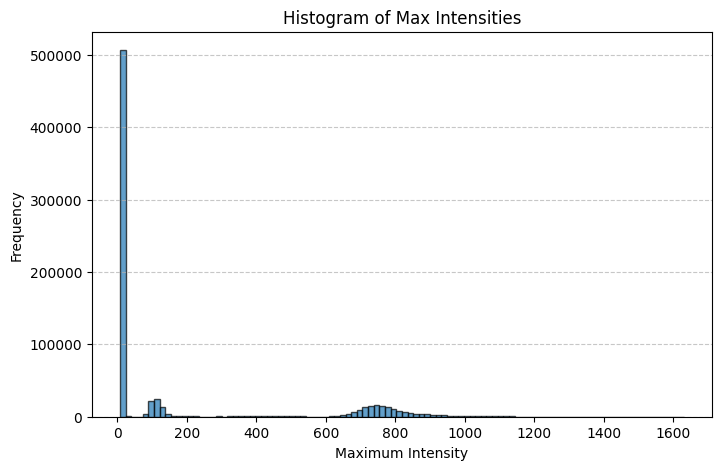

In [15]:
plot_filtered_max_intensities_histogram(data)

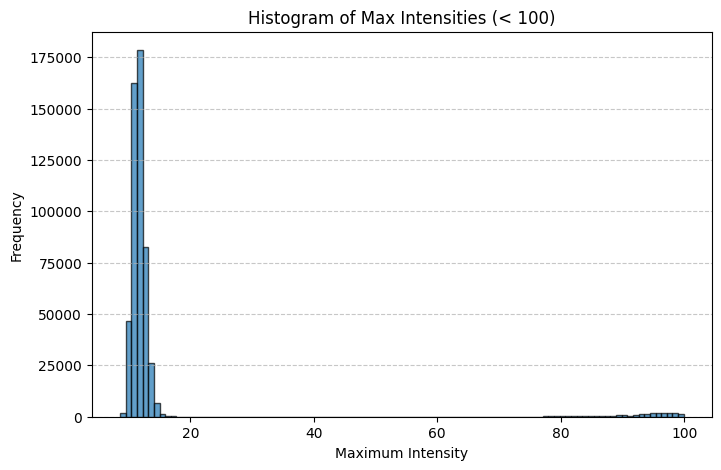

In [16]:
plot_filtered_max_intensities_histogram(data, threshold=100)

In [17]:
data[data["Intensities"].apply(lambda x: np.all(x < 20))]

,Time,Intensities
0,2024-12-02 07:59:59.061744213,"[4.77, -1.31, -2.98, 3.81, 7.17, -6.02, 3.74, ..."
1,2024-12-02 08:00:00.166635990,"[-4.23, -5.31, 2.02, 4.81, 3.17, -6.02, 5.74, ..."
2,2024-12-02 08:00:01.218027115,"[2.77, 2.69, -2.98, 1.81, 6.17, 1.98, 5.74, 0...."
3,2024-12-02 08:00:02.222875118,"[-1.23, -3.31, -1.98, 9.81, 8.17, -4.02, 5.74,..."
4,2024-12-02 08:00:03.228739262,"[1.77, -2.31, -0.98, 5.81, 7.17, -5.02, 5.74, ..."
...,...,...
741563,2024-11-29 19:59:55.862777710,"[-2.23, -2.31, -5.98, 5.81, 8.17, -7.02, 2.74,..."
741564,2024-11-29 19:59:56.867658615,"[0.77, 2.69, -0.98, 6.81, 9.17, -6.02, 3.74, -..."
741565,2024-11-29 19:59:57.928452969,"[-0.23, -2.31, -0.98, 1.81, 7.17, -3.02, 0.74,..."
741566,2024-11-29 19:59:58.985373020,"[1.77, -5.31, -0.98, 7.81, 4.17, -8.02, 3.74, ..."


In [18]:
data[data["Intensities"].apply(lambda x: ~np.all(x < 20))]

,Time,Intensities
9481,2024-12-02 10:45:41.102451801,"[-1.23, -6.31, -2.98, 5.81, 4.17, -4.02, 1.74,..."
9482,2024-12-02 10:45:42.156838417,"[3.77, -2.31, -0.98, 5.81, 3.17, -5.02, 5.74, ..."
9483,2024-12-02 10:45:43.165356636,"[-0.23, -2.31, -1.98, 8.81, 5.17, -5.02, 2.74,..."
9484,2024-12-02 10:45:44.217716217,"[-1.23, -1.31, -0.98, 2.81, 4.17, -3.02, 5.74,..."
9485,2024-12-02 10:45:45.271930218,"[3.77, -5.31, -4.98, 4.81, 11.17, -4.02, -0.26..."
...,...,...
734251,2024-11-29 17:52:11.584772110,"[-0.23, -2.31, -0.98, 8.81, 4.17, -5.02, 3.74,..."
734252,2024-11-29 17:52:12.638651371,"[-1.23, -5.31, -2.98, 7.81, 5.17, -6.02, 2.74,..."
734253,2024-11-29 17:52:13.693878174,"[3.77, -3.31, -1.98, 3.81, 10.17, -5.02, 2.74,..."
734254,2024-11-29 17:52:14.701157570,"[-0.23, -0.31, -3.98, 3.81, 5.17, -6.02, 3.74,..."


In [19]:
data[data["Intensities"].apply(lambda x: np.all(x < 200))]

,Time,Intensities
0,2024-12-02 07:59:59.061744213,"[4.77, -1.31, -2.98, 3.81, 7.17, -6.02, 3.74, ..."
1,2024-12-02 08:00:00.166635990,"[-4.23, -5.31, 2.02, 4.81, 3.17, -6.02, 5.74, ..."
2,2024-12-02 08:00:01.218027115,"[2.77, 2.69, -2.98, 1.81, 6.17, 1.98, 5.74, 0...."
3,2024-12-02 08:00:02.222875118,"[-1.23, -3.31, -1.98, 9.81, 8.17, -4.02, 5.74,..."
4,2024-12-02 08:00:03.228739262,"[1.77, -2.31, -0.98, 5.81, 7.17, -5.02, 5.74, ..."
...,...,...
741563,2024-11-29 19:59:55.862777710,"[-2.23, -2.31, -5.98, 5.81, 8.17, -7.02, 2.74,..."
741564,2024-11-29 19:59:56.867658615,"[0.77, 2.69, -0.98, 6.81, 9.17, -6.02, 3.74, -..."
741565,2024-11-29 19:59:57.928452969,"[-0.23, -2.31, -0.98, 1.81, 7.17, -3.02, 0.74,..."
741566,2024-11-29 19:59:58.985373020,"[1.77, -5.31, -0.98, 7.81, 4.17, -8.02, 3.74, ..."


In [20]:
data[data["Intensities"].apply(lambda x: ~np.all(x < 200))]

,Time,Intensities
9605,2024-12-02 10:47:51.133003235,"[-0.23, -1.31, -2.98, 0.81, 5.17, -5.02, 4.74,..."
9606,2024-12-02 10:47:52.135130405,"[-1.23, -1.31, -1.98, 9.81, 6.17, -5.02, 1.74,..."
9607,2024-12-02 10:47:53.143270493,"[-0.23, -0.31, -1.98, 3.81, 3.17, -5.02, 6.74,..."
9623,2024-12-02 10:48:09.695835114,"[-1.23, -3.31, -2.98, 6.81, 13.17, -5.02, 2.74..."
9625,2024-12-02 10:48:11.860176086,"[0.77, -1.31, 2.02, 6.81, 9.17, -4.02, 5.74, 4..."
...,...,...
734113,2024-11-29 17:49:46.712699890,"[0.77, -1.31, -1.98, 6.81, 4.17, -3.02, 5.74, ..."
734114,2024-11-29 17:49:47.821994305,"[1.77, -3.31, -0.98, 7.81, 7.17, -3.02, 6.74, ..."
734115,2024-11-29 17:49:48.826716900,"[0.77, -2.31, -6.98, 7.81, 5.17, -8.02, 3.74, ..."
734116,2024-11-29 17:49:49.883495331,"[2.77, 0.69, -2.98, 7.81, 5.17, -6.02, 5.74, 3..."


In [45]:
data["Intensities"].apply(len).nunique() == 1

True

## Filter data with intensities near to 0

In [21]:
data_filtered = data[data["Intensities"].apply(lambda x: ~np.all(x < 20))]
data_filtered.head()

,Time,Intensities
9481,2024-12-02 10:45:41.102451801,"[-1.23, -6.31, -2.98, 5.81, 4.17, -4.02, 1.74,..."
9482,2024-12-02 10:45:42.156838417,"[3.77, -2.31, -0.98, 5.81, 3.17, -5.02, 5.74, ..."
9483,2024-12-02 10:45:43.165356636,"[-0.23, -2.31, -1.98, 8.81, 5.17, -5.02, 2.74,..."
9484,2024-12-02 10:45:44.217716217,"[-1.23, -1.31, -0.98, 2.81, 4.17, -3.02, 5.74,..."
9485,2024-12-02 10:45:45.271930218,"[3.77, -5.31, -4.98, 4.81, 11.17, -4.02, -0.26..."


## Check wavelengths

In [23]:
wavelengths_old = np.load('../data/wavelengths.npy')
len(wavelengths_old)

1024

In [25]:
wavelengths_path = "../data/18-11_11-12_spectra/spec-diag1-ch8-wavelengths.txt"

with open(wavelengths_path, "r") as f:
        lines = f.readlines()
        
# Find the start of the data (ignoring header lines)
for i, line in enumerate(lines):
    if line.startswith("# Time"):  # Identify the header line
        data_start_idx = i + 1
        break
        
data_list = []
for line in lines[data_start_idx:]:
    parts = line.strip().split("\t")
    if len(parts) == 4:
        time, wavelengths, severity, status = parts
        data_list.append([time, wavelengths, severity, status])

df = pd.DataFrame(data_list, columns=["Time", "Wavelengths", "Severity", "Status"])
df.head()

,Time,Wavelengths,Severity,Status
0,2024-12-09 06:00:01.439000000,"634.84, 635.30, 635.76, 636.22, 636.68, 637.14...",NONE,NO_ALARM
1,2024-12-09 23:00:01.198999999,Archive_Disabled,#N/A,#N/A


In [27]:
wavelengths_str = df.loc[0, "Wavelengths"]
wavelengths_new = np.array([float(i) for i in wavelengths_str.split(",")])
print(len(wavelengths_new))
wavelengths_new

1024


array([ 634.84,  635.3 ,  635.76, ..., 1123.06, 1123.56, 1124.05])

In [28]:
np.array_equal(wavelengths_new, wavelengths_old)

False

In [29]:
wavelengths_old

array([ 634.835144,  635.296997,  635.758911, ..., 1123.063232,
       1123.557739, 1124.052368])

In [30]:
wavelengths_new

array([ 634.84,  635.3 ,  635.76, ..., 1123.06, 1123.56, 1124.05])

In [31]:
np.allclose(wavelengths_new, wavelengths_old, atol=1e-2)

True

In [32]:
np.save("../data/wavelengths_new.npy", wavelengths_new)

## Plot intensities

In [33]:
intensities = data_filtered['Intensities']

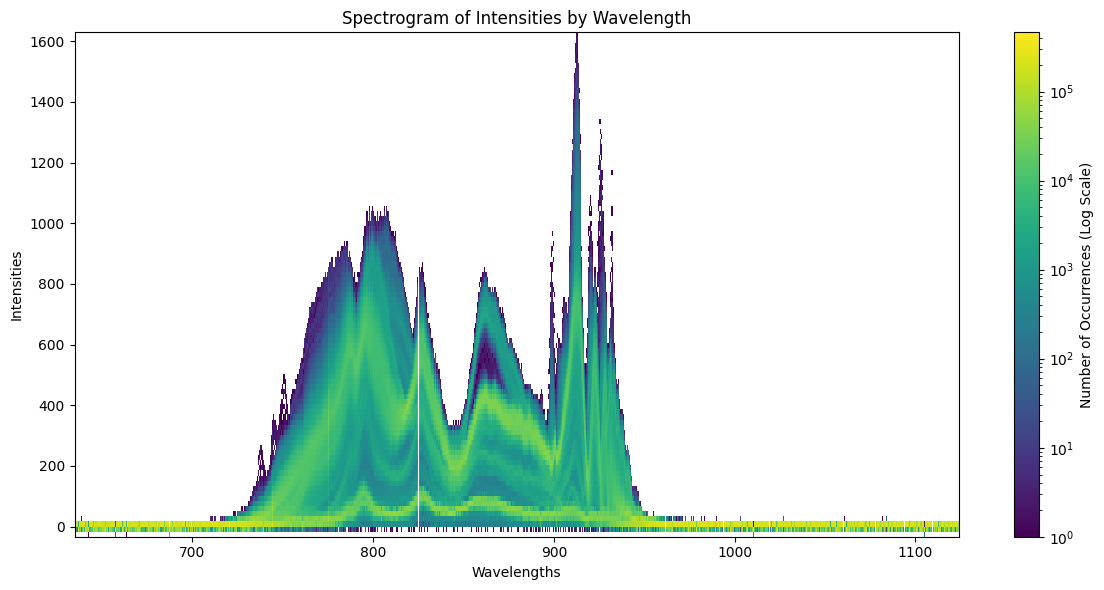

In [52]:
create_spectrogram(wavelengths_new, intensities.tolist(), label="Spectrogram of Intensities by Wavelength")

[  7526  38880 175625 135621  29766]


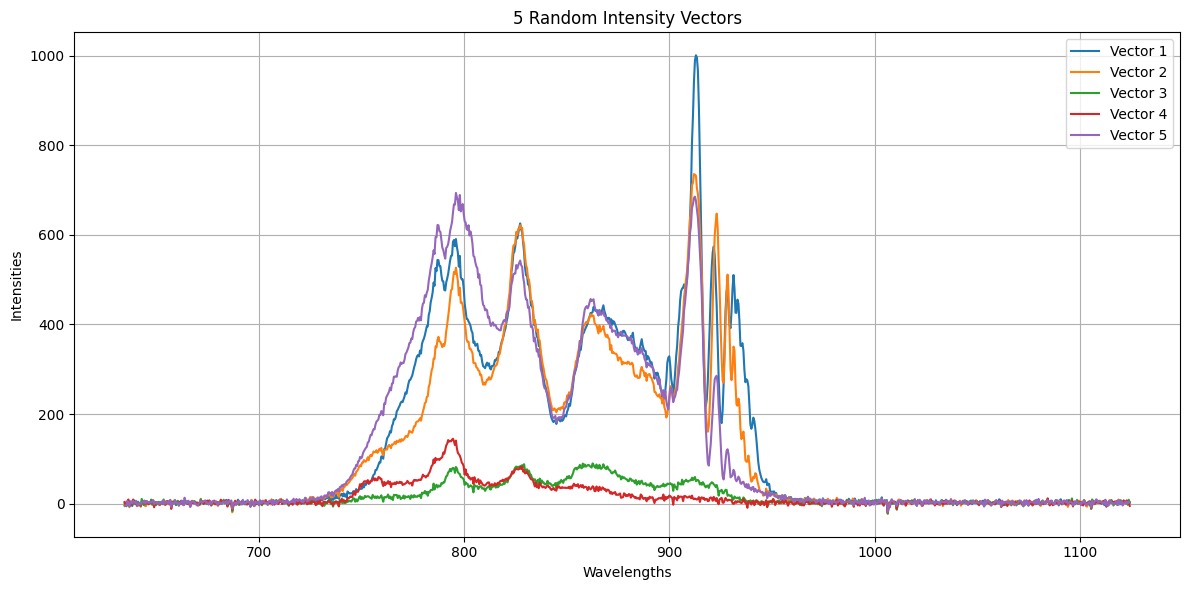

In [70]:
plot_random_intensity_vectors(wavelengths_new, 
                              np.array(intensities),
                            num_vectors=5)

[180504 184957  23340  38497  52161]


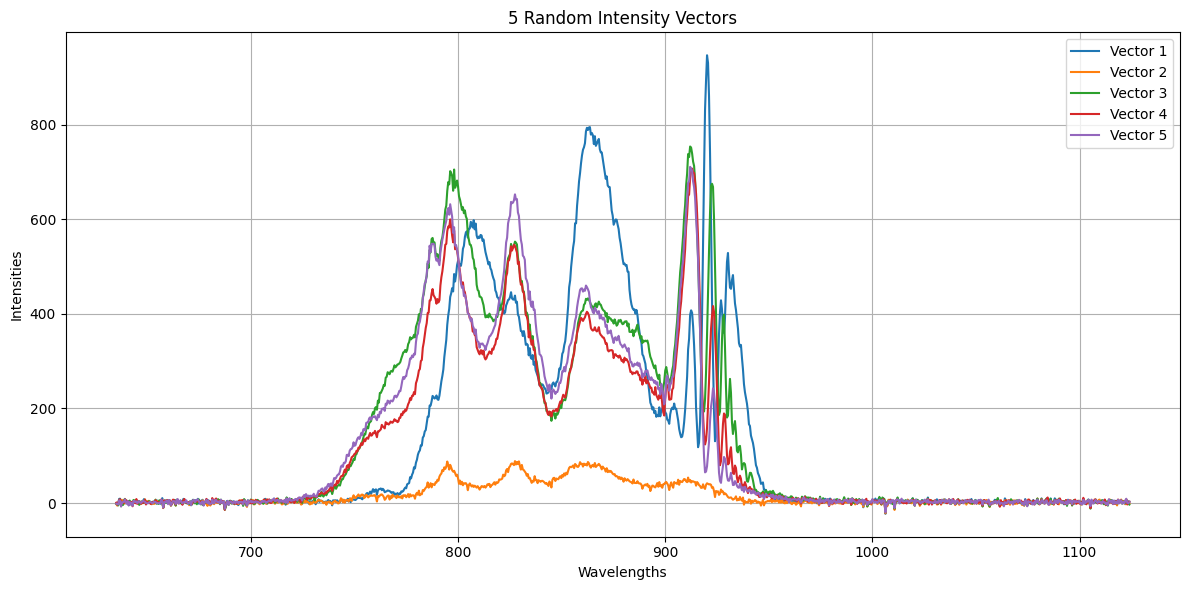

In [71]:
plot_random_intensity_vectors(wavelengths_new, 
                              np.array(intensities),
                            num_vectors=5)

[183602 131064  60944 178864  20689]


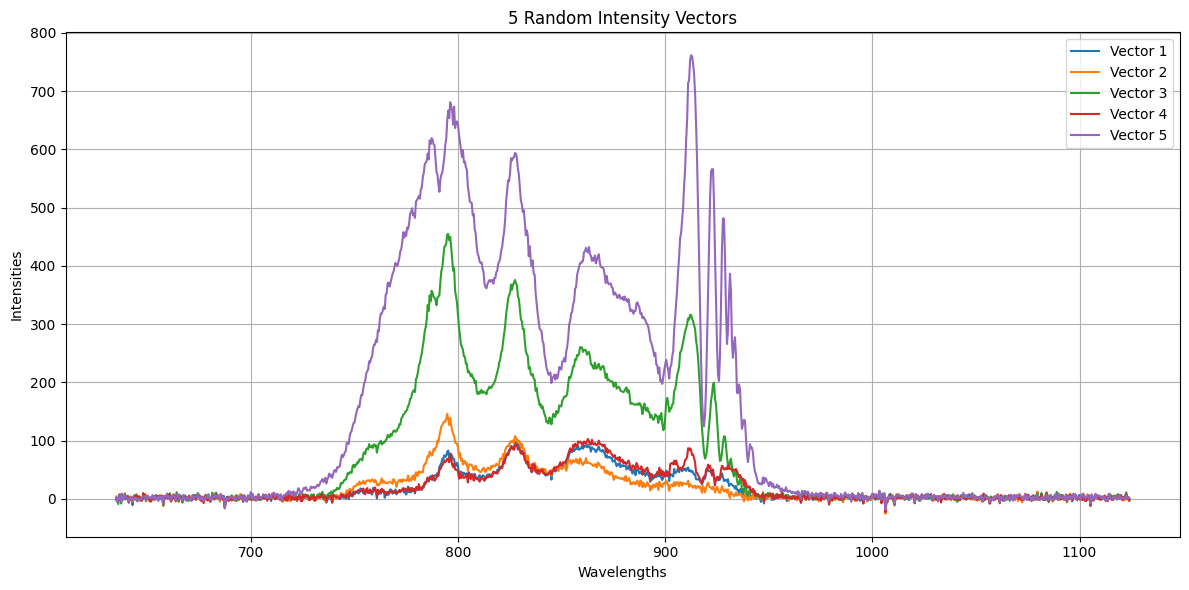

In [72]:
plot_random_intensity_vectors(wavelengths_new, 
                              np.array(intensities),
                            num_vectors=5)

## Check time

In [73]:
data_filtered

,Time,Intensities
9481,2024-12-02 10:45:41.102451801,"[-1.23, -6.31, -2.98, 5.81, 4.17, -4.02, 1.74,..."
9482,2024-12-02 10:45:42.156838417,"[3.77, -2.31, -0.98, 5.81, 3.17, -5.02, 5.74, ..."
9483,2024-12-02 10:45:43.165356636,"[-0.23, -2.31, -1.98, 8.81, 5.17, -5.02, 2.74,..."
9484,2024-12-02 10:45:44.217716217,"[-1.23, -1.31, -0.98, 2.81, 4.17, -3.02, 5.74,..."
9485,2024-12-02 10:45:45.271930218,"[3.77, -5.31, -4.98, 4.81, 11.17, -4.02, -0.26..."
...,...,...
734251,2024-11-29 17:52:11.584772110,"[-0.23, -2.31, -0.98, 8.81, 4.17, -5.02, 3.74,..."
734252,2024-11-29 17:52:12.638651371,"[-1.23, -5.31, -2.98, 7.81, 5.17, -6.02, 2.74,..."
734253,2024-11-29 17:52:13.693878174,"[3.77, -3.31, -1.98, 3.81, 10.17, -5.02, 2.74,..."
734254,2024-11-29 17:52:14.701157570,"[-0.23, -0.31, -3.98, 3.81, 5.17, -6.02, 3.74,..."


In [78]:
data_filtered['Time'].dt.hour.value_counts().sort_index()

Time
8      3133
9     17473
10    26439
11    25055
12    14589
13    37881
14    33649
15    28800
16    17709
17    16432
18     8457
19     5145
20        1
Name: count, dtype: int64

/tmp/ipykernel_1982828/2810333865.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = pd.to_datetime(df[time_column])
/tmp/ipykernel_1982828/2810333865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df[time_column].dt.hour


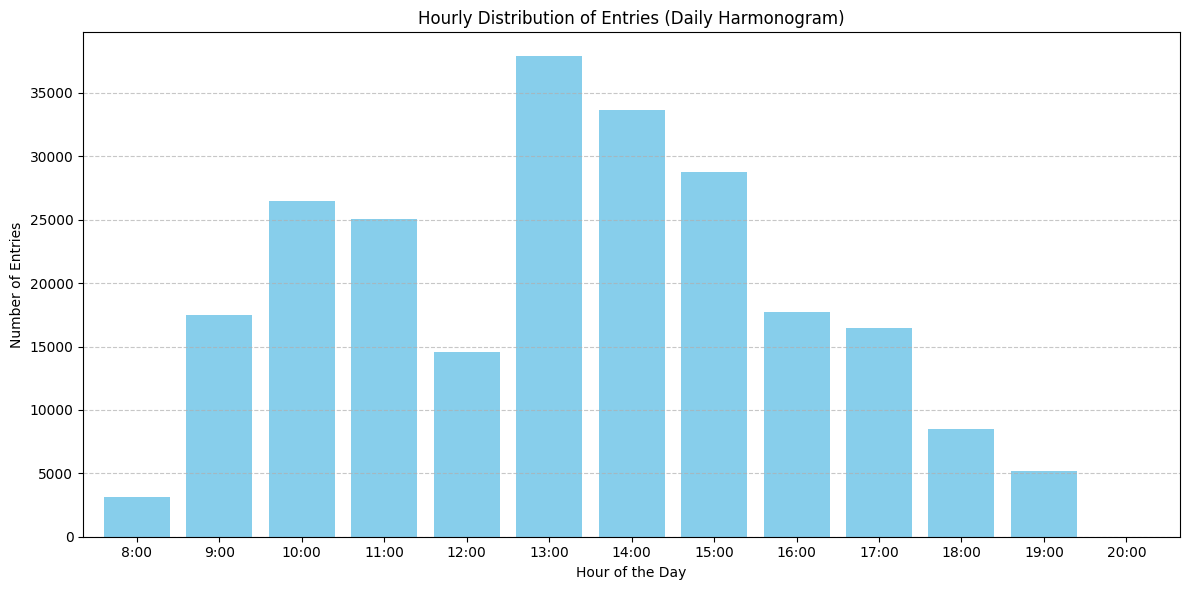

In [79]:
plot_hourly_histogram(data_filtered)

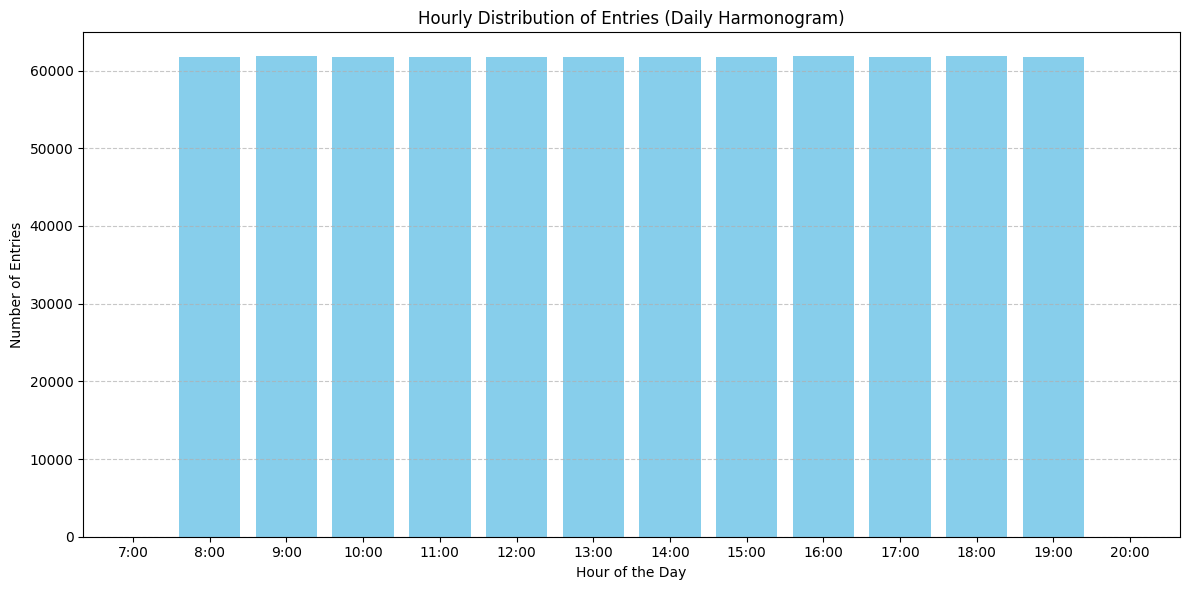

In [80]:
plot_hourly_histogram(data)

/tmp/ipykernel_1982828/2442587199.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = pd.to_datetime(df[time_column])
/tmp/ipykernel_1982828/2442587199.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df[time_column].dt.date
/tmp/ipykernel_1982828/2442587199.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

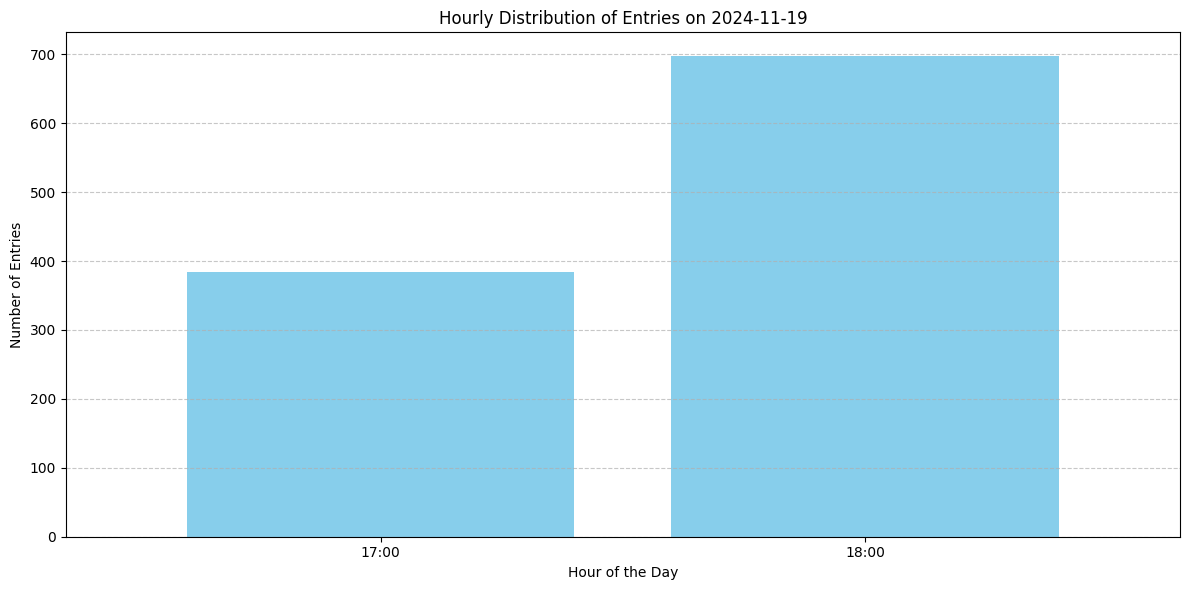

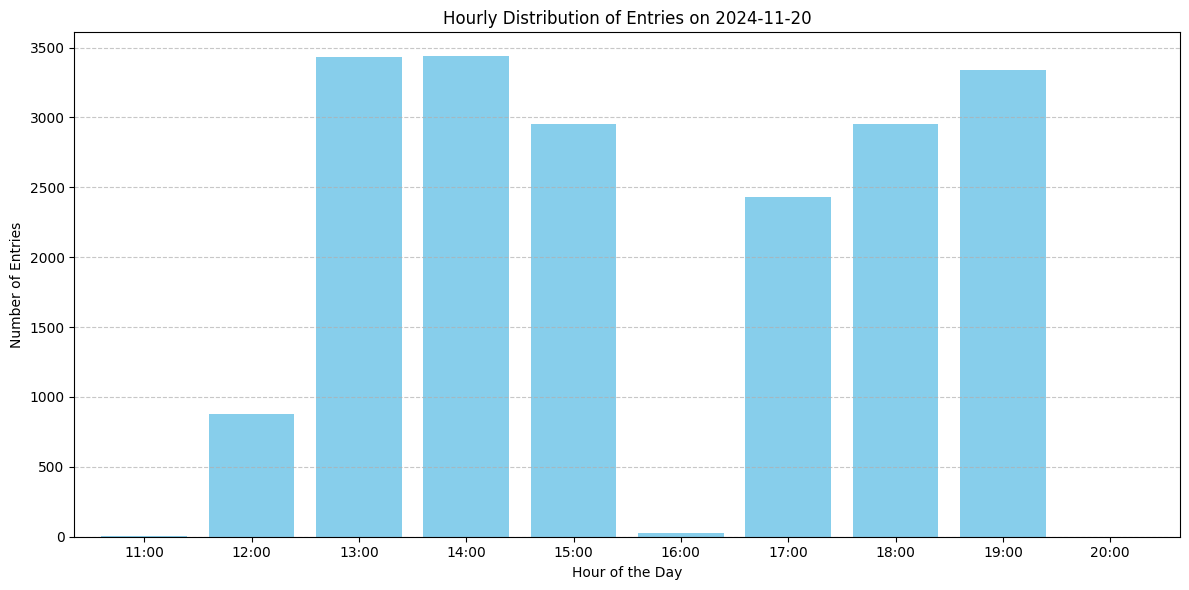

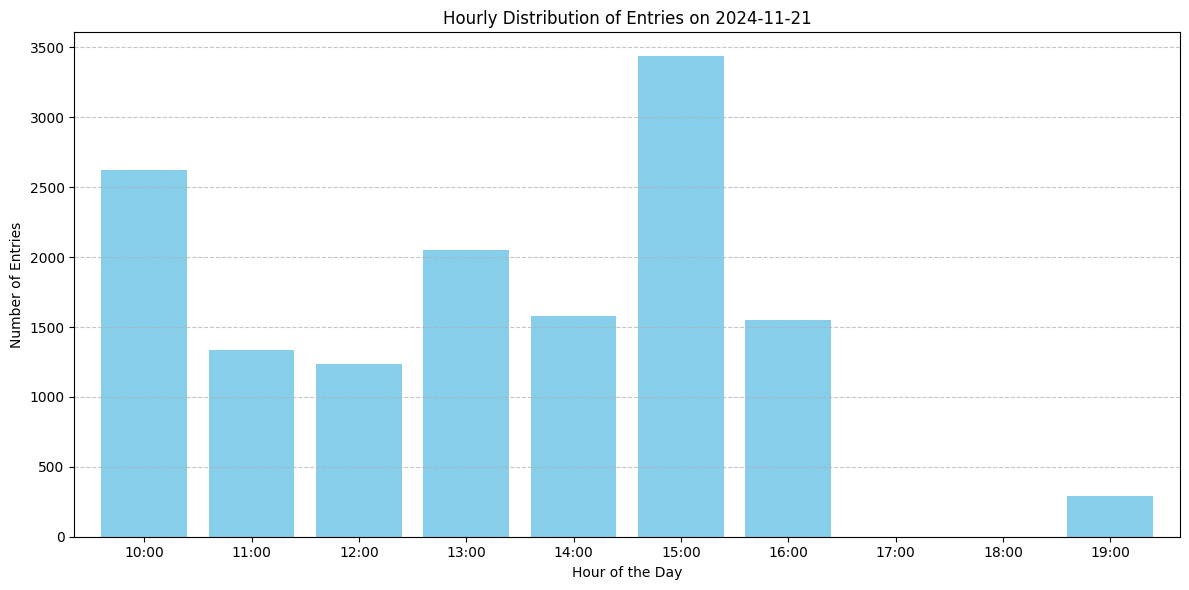

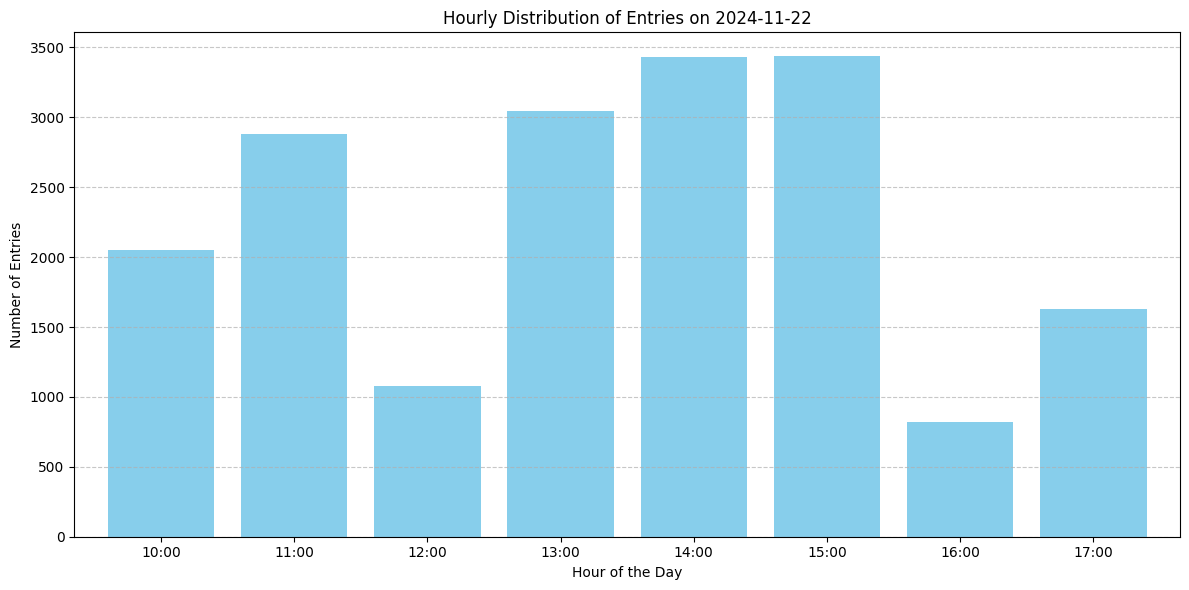

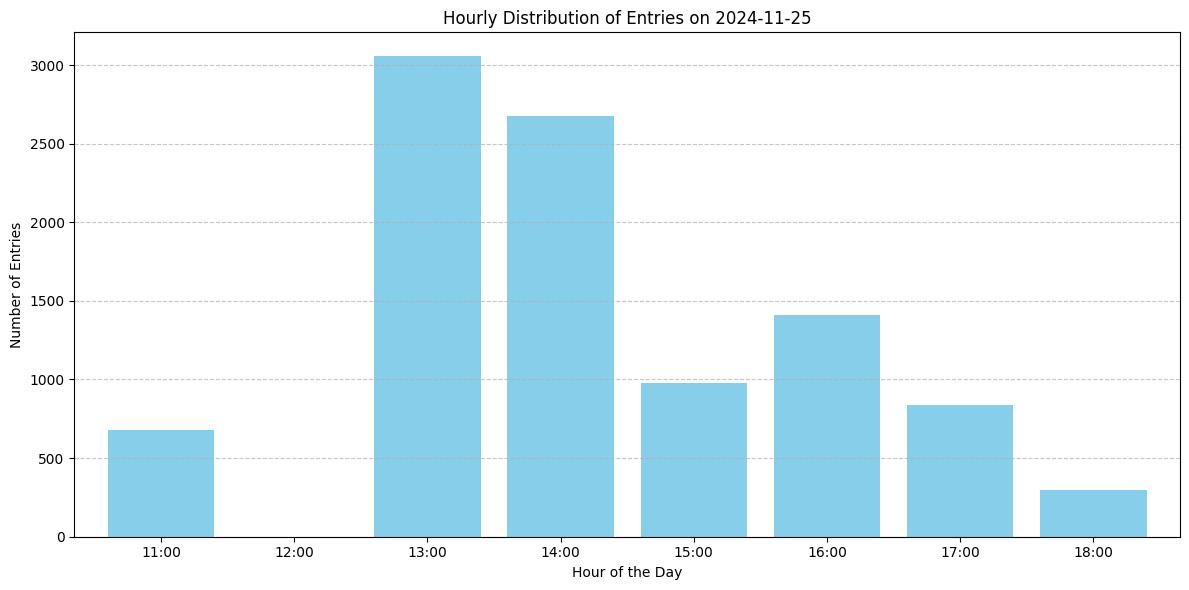

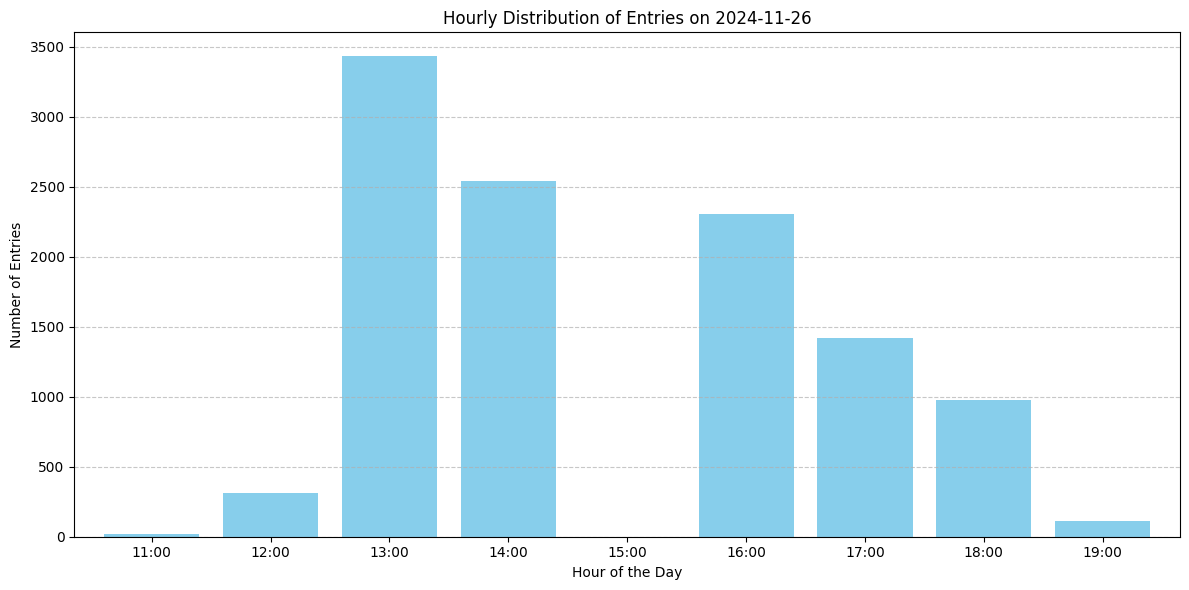

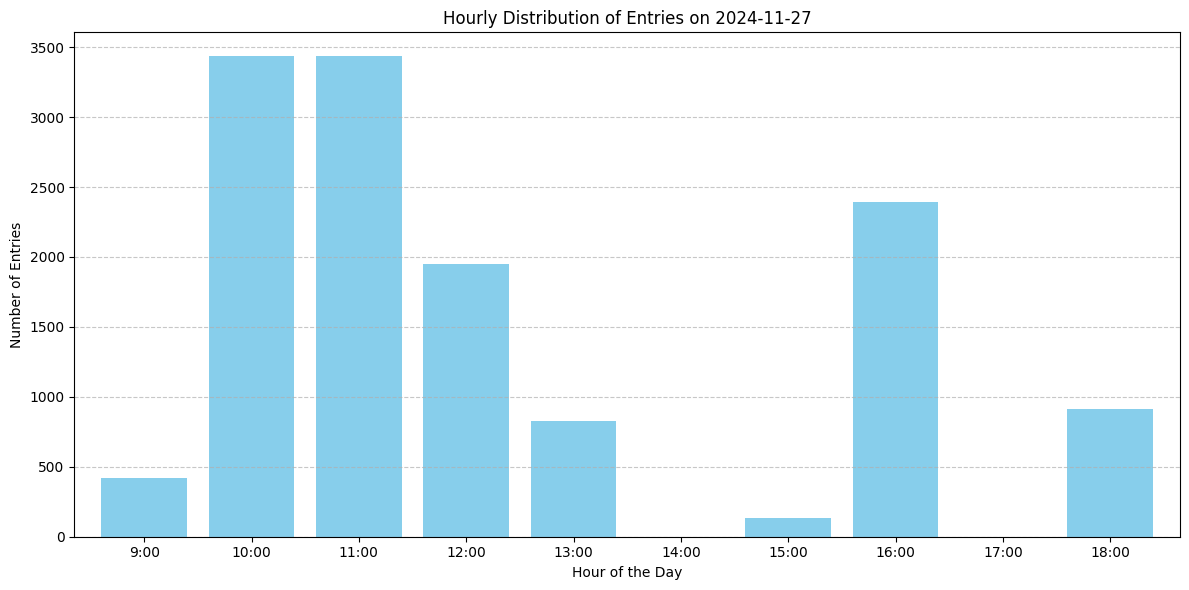

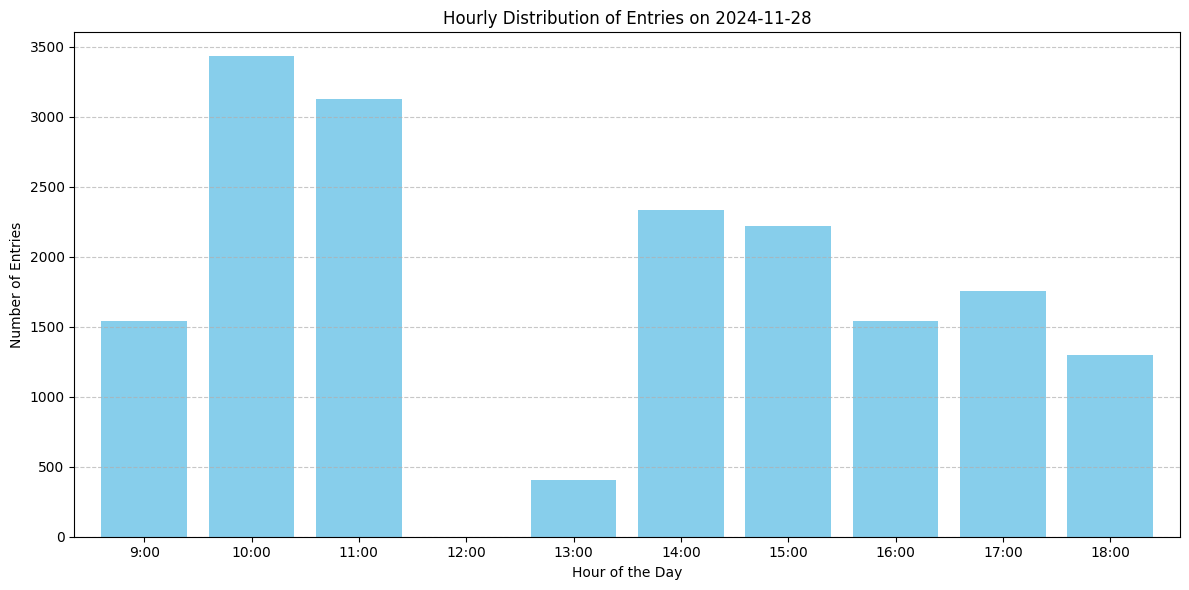

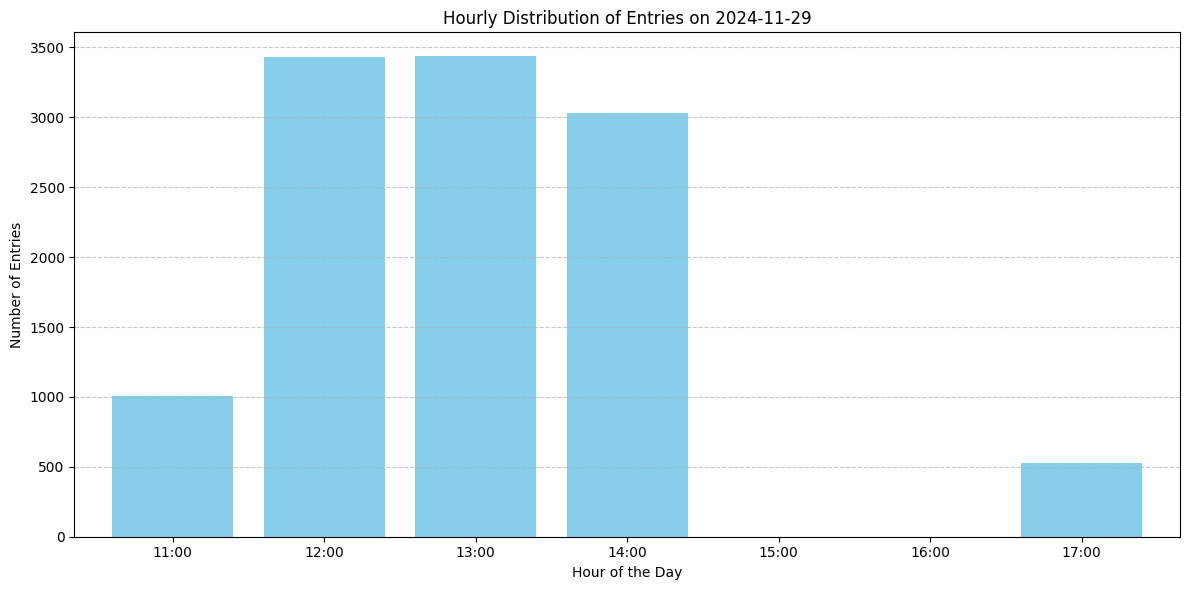

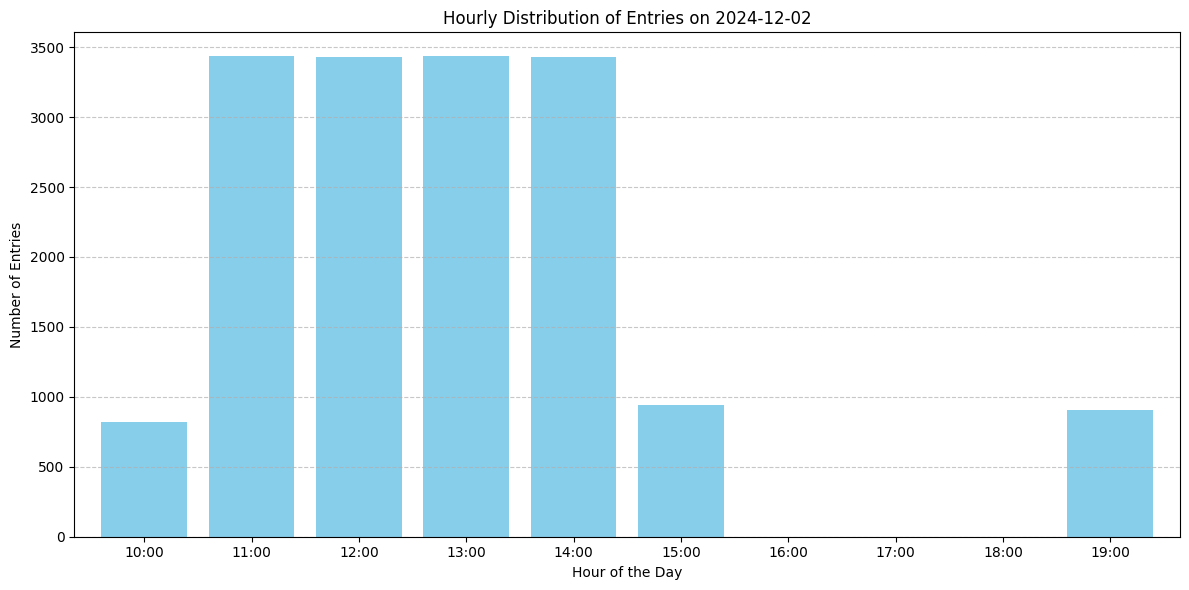

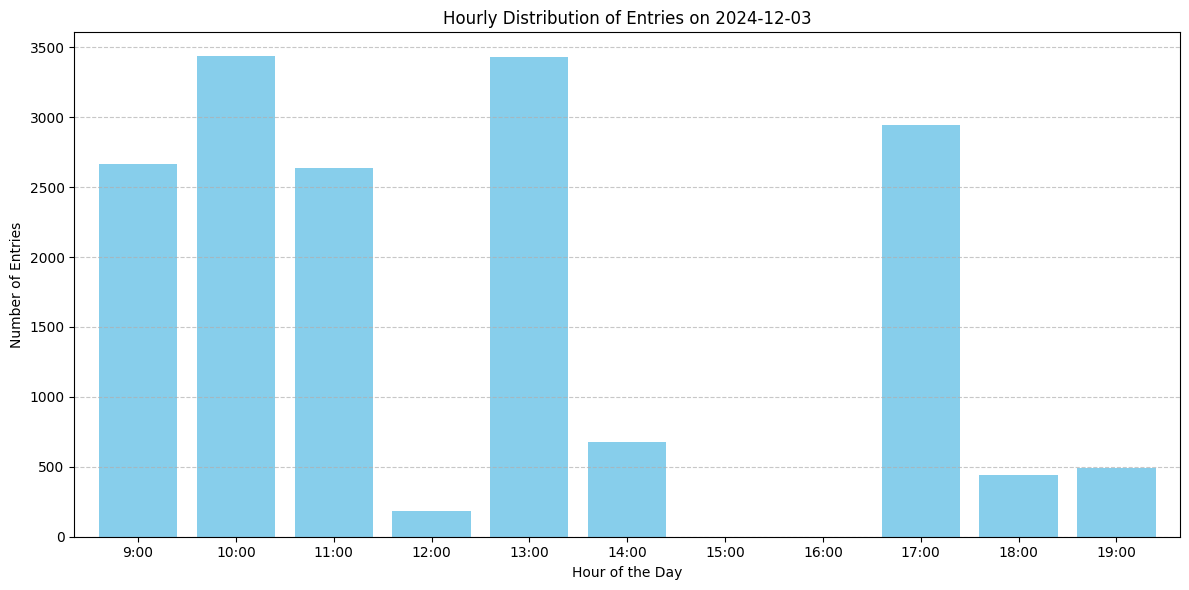

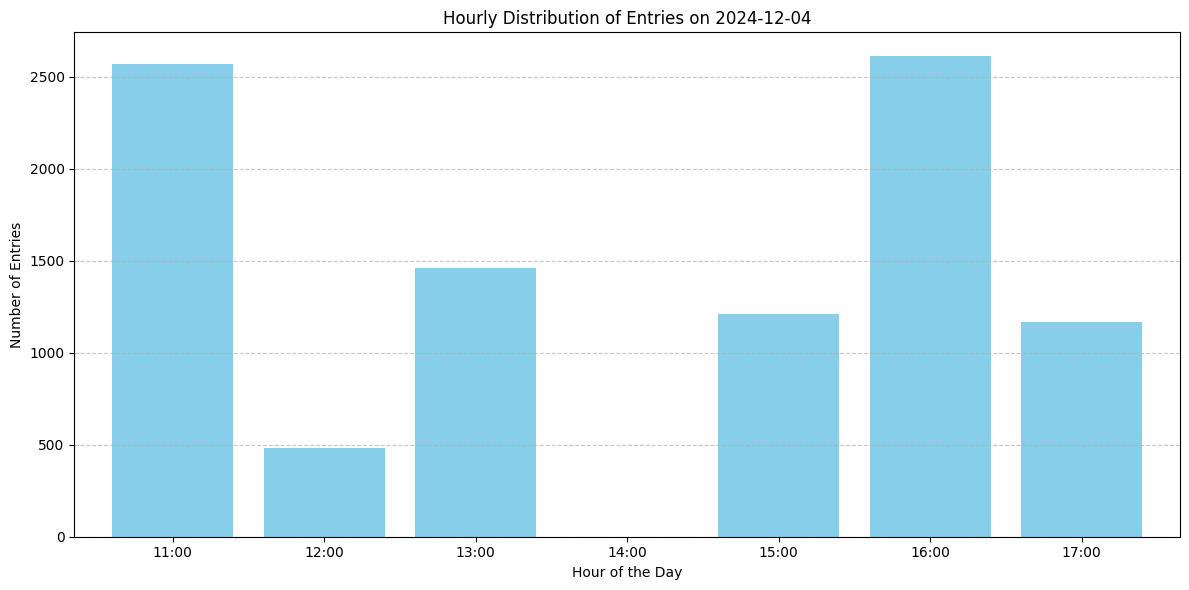

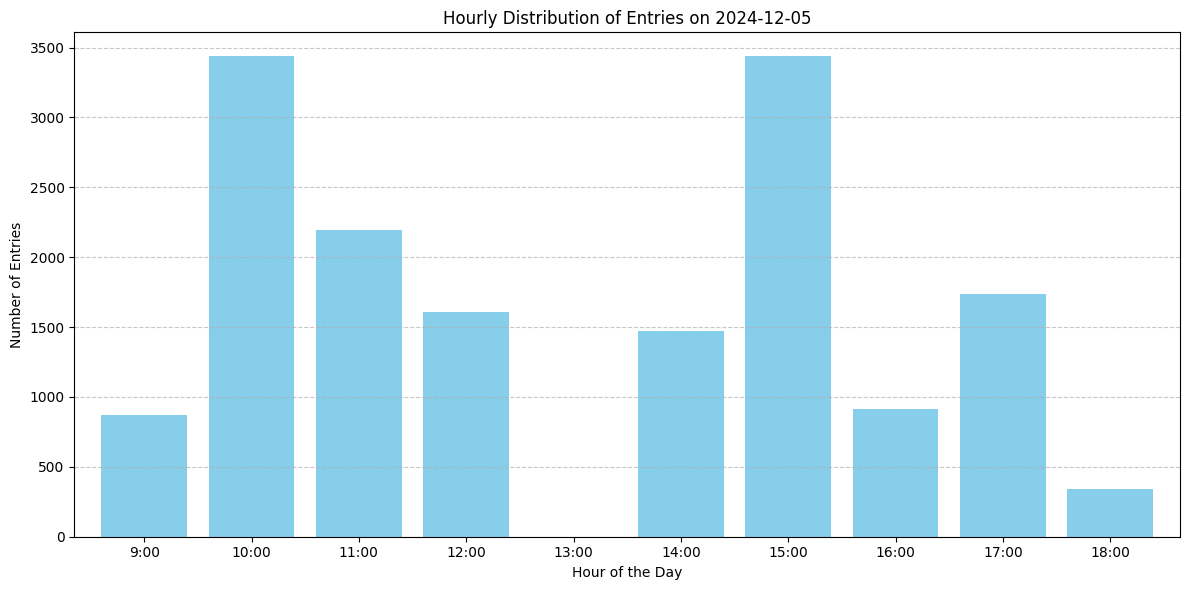

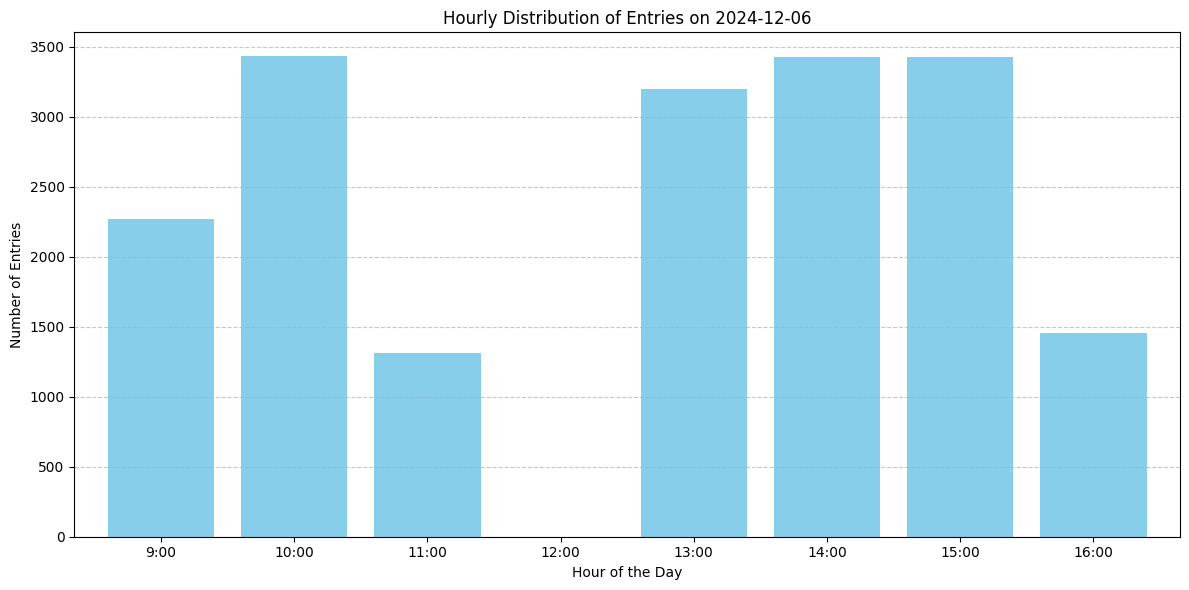

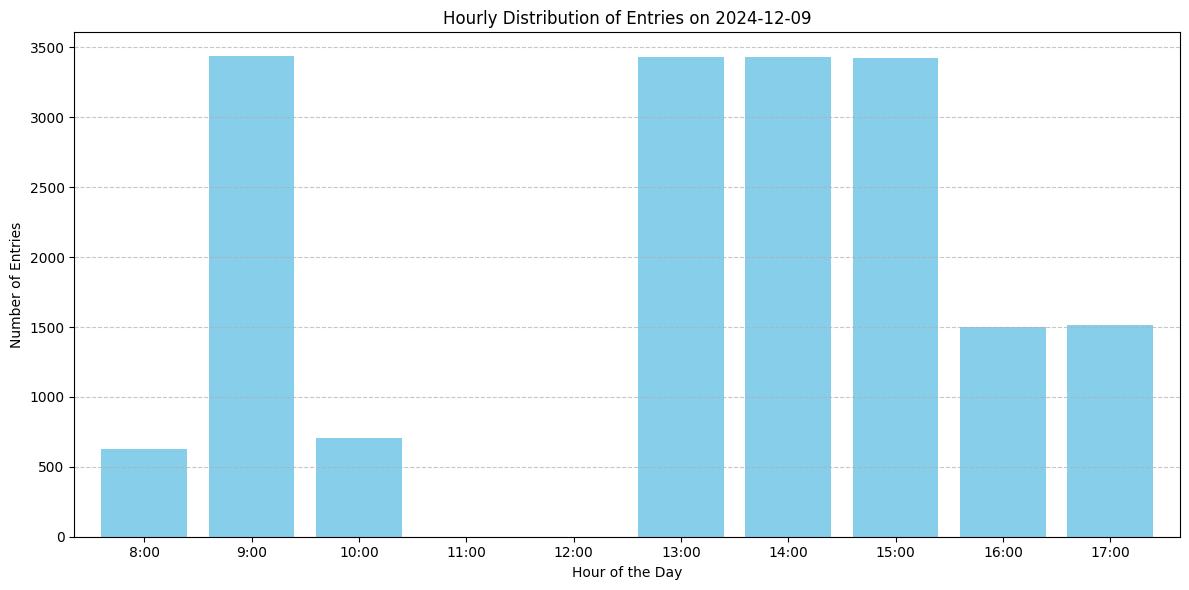

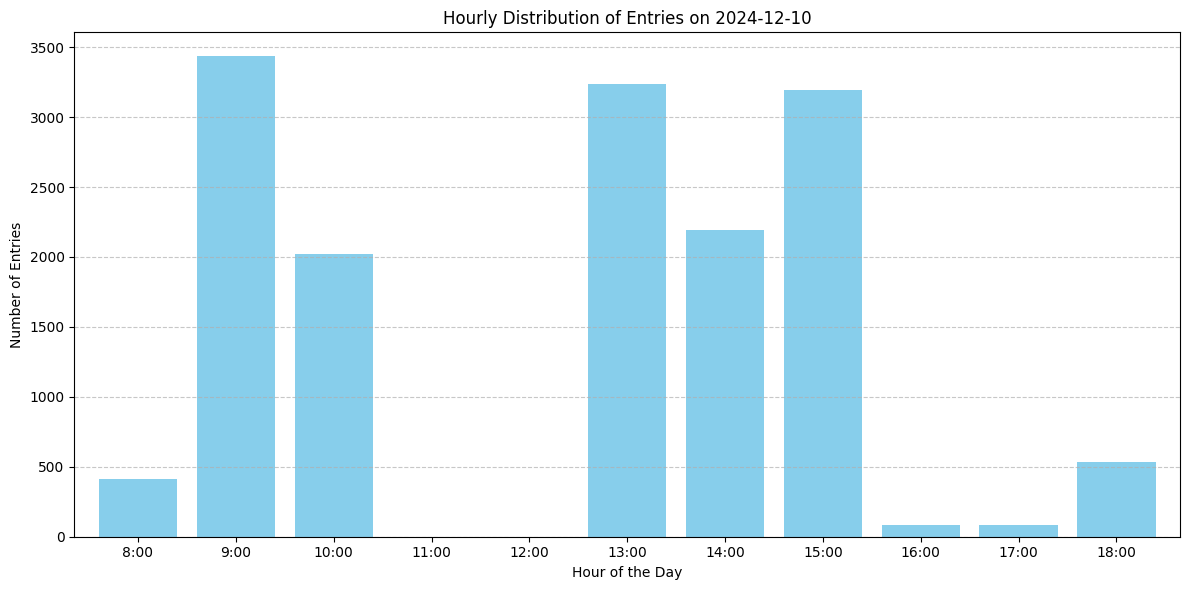

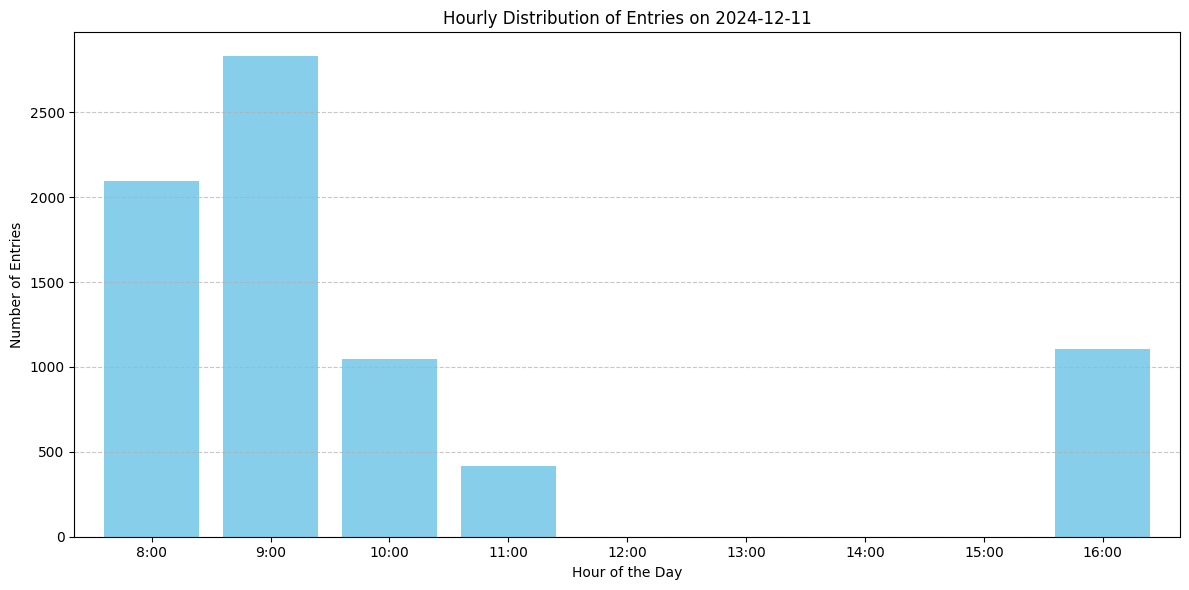

In [84]:
plot_daily_hourly_histograms(data_filtered)

/tmp/ipykernel_1982828/3095777358.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = pd.to_datetime(df[time_column])
/tmp/ipykernel_1982828/3095777358.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df[time_column].dt.date
/tmp/ipykernel_1982828/3095777358.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

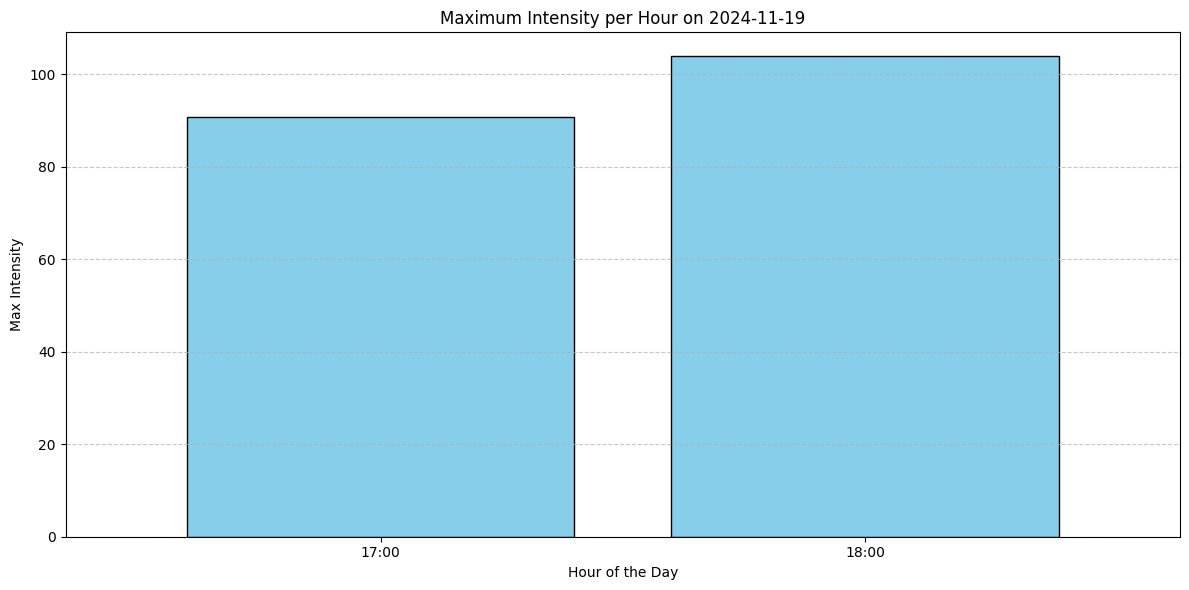

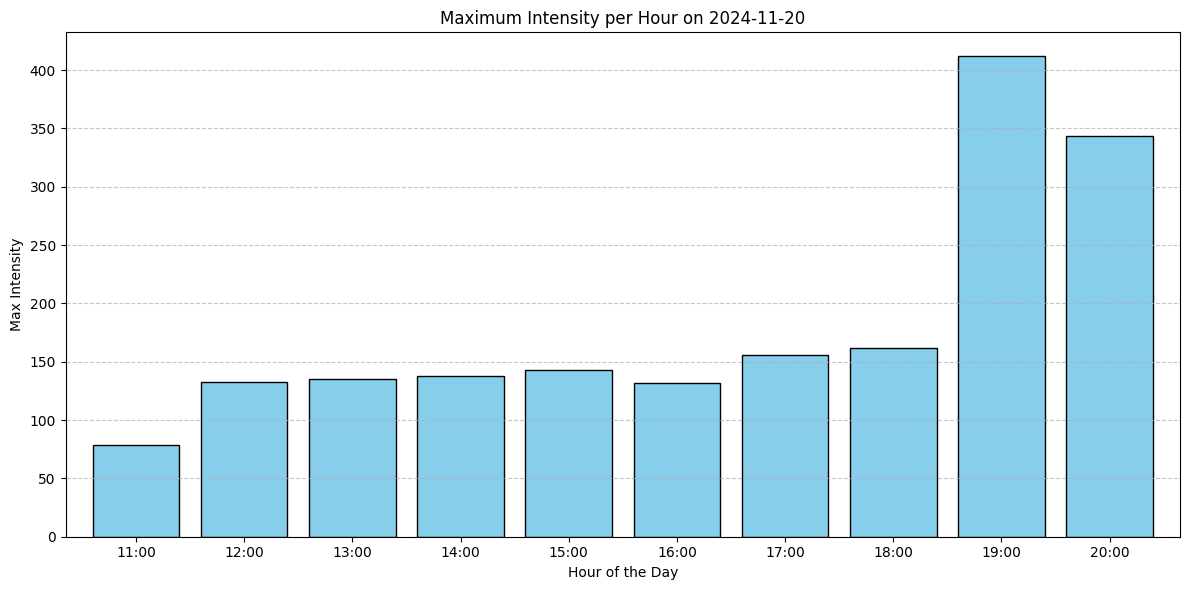

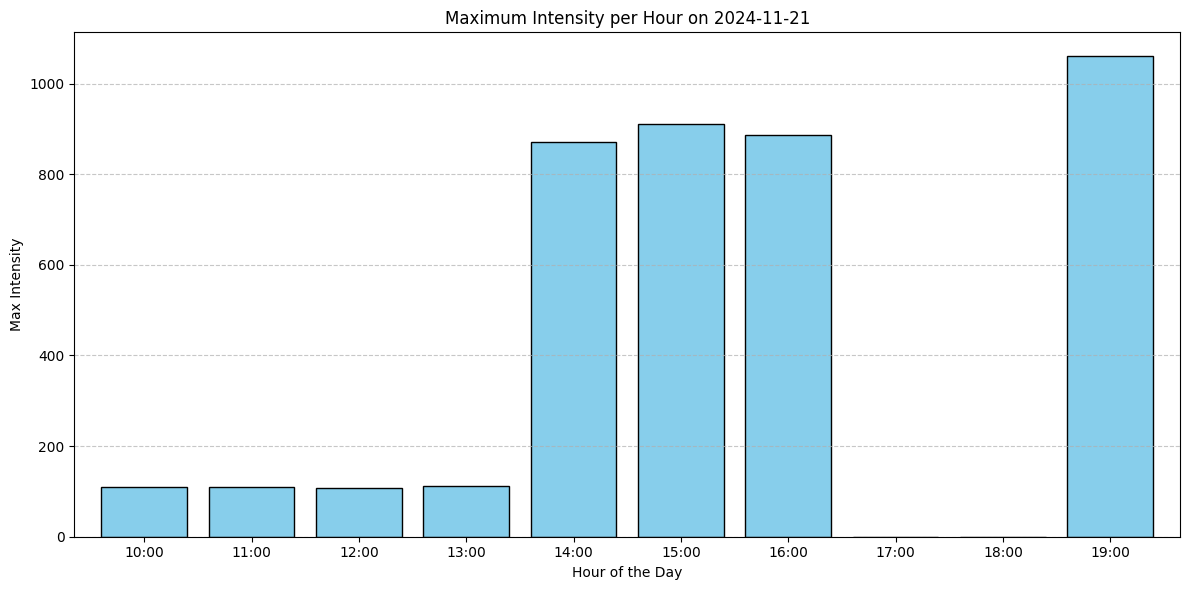

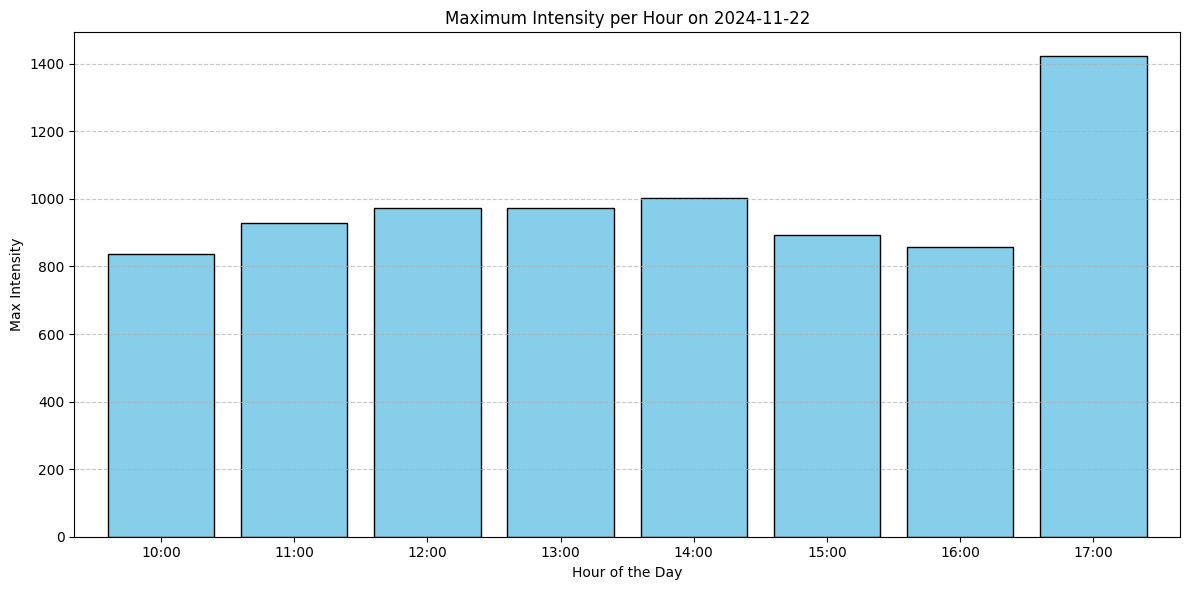

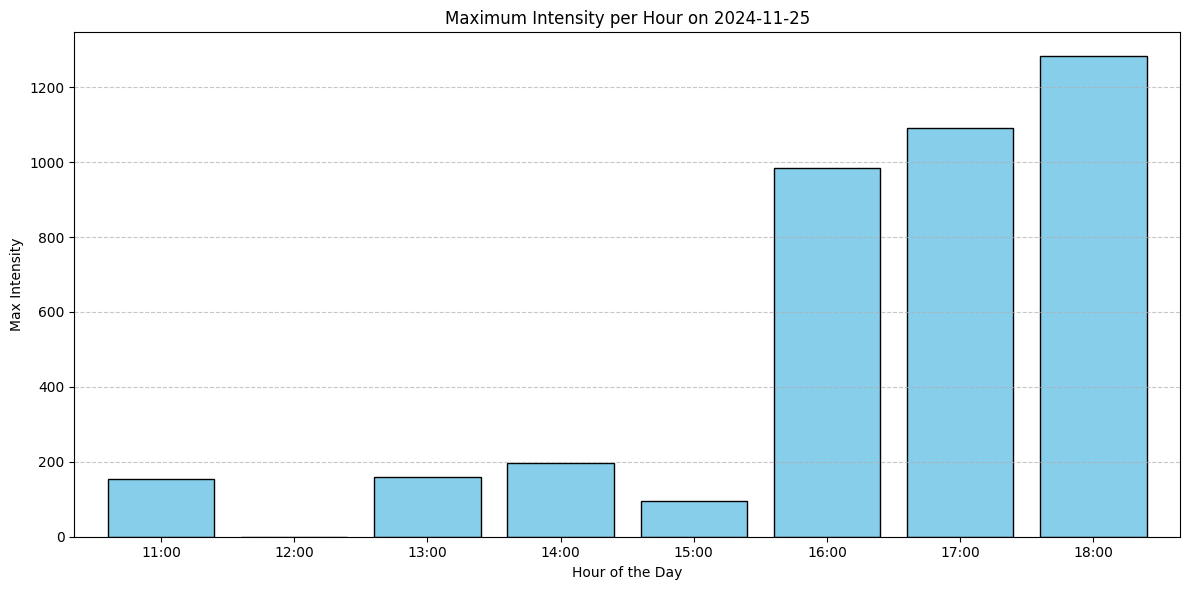

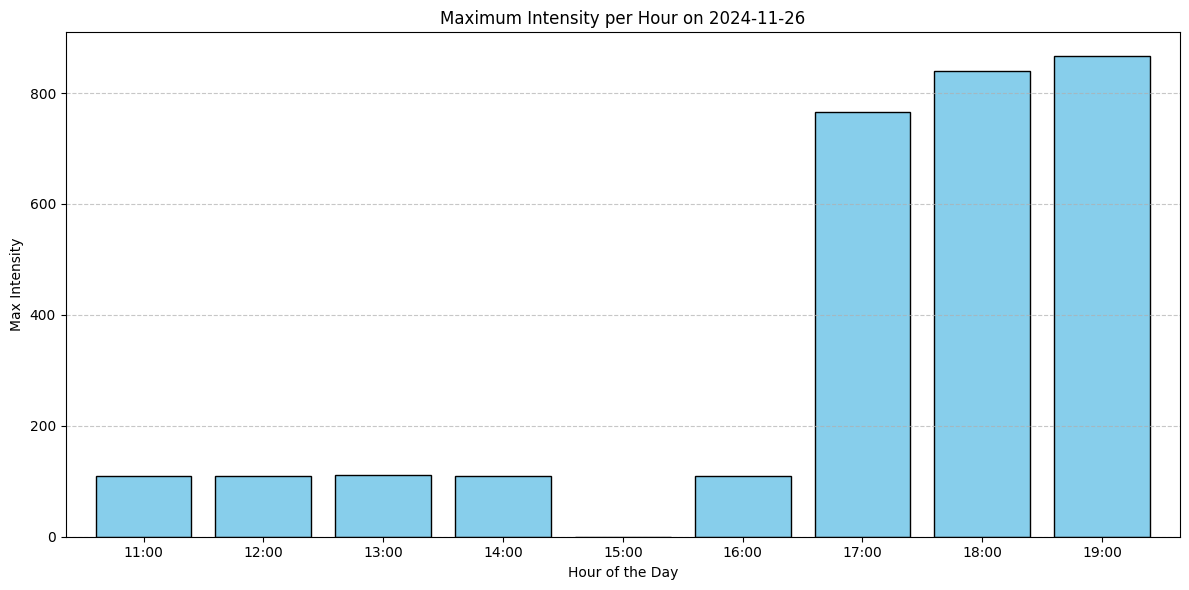

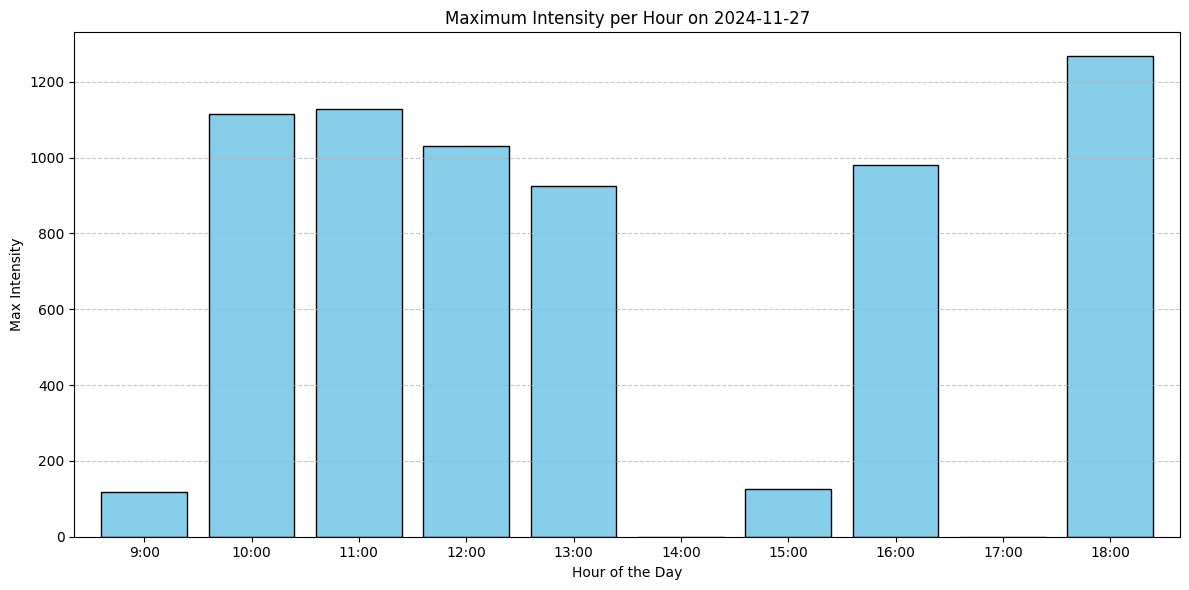

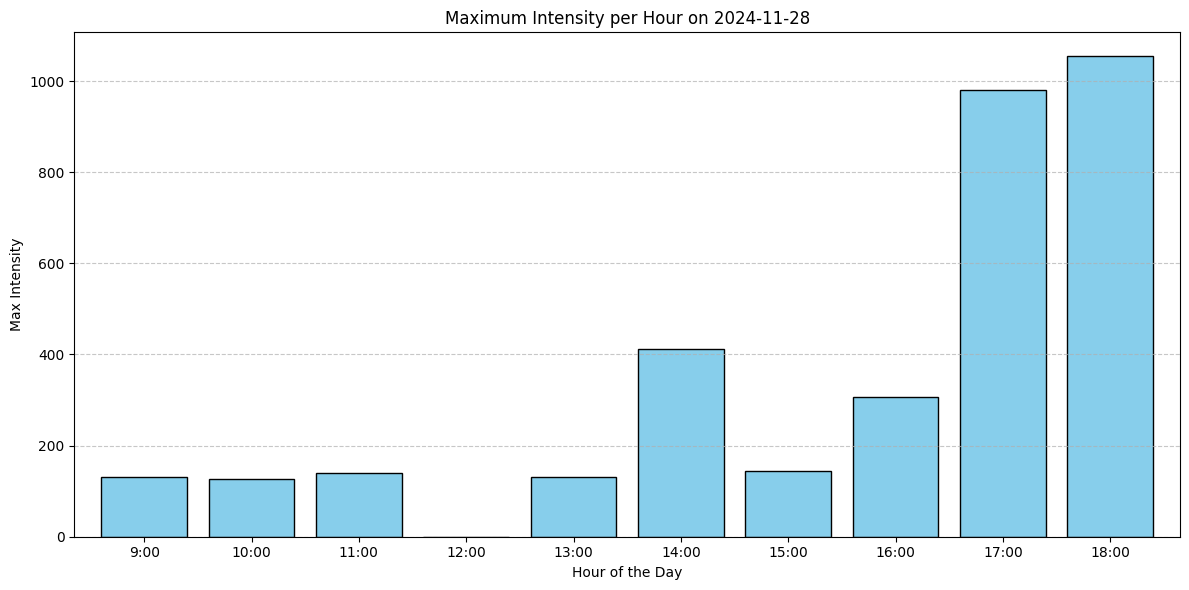

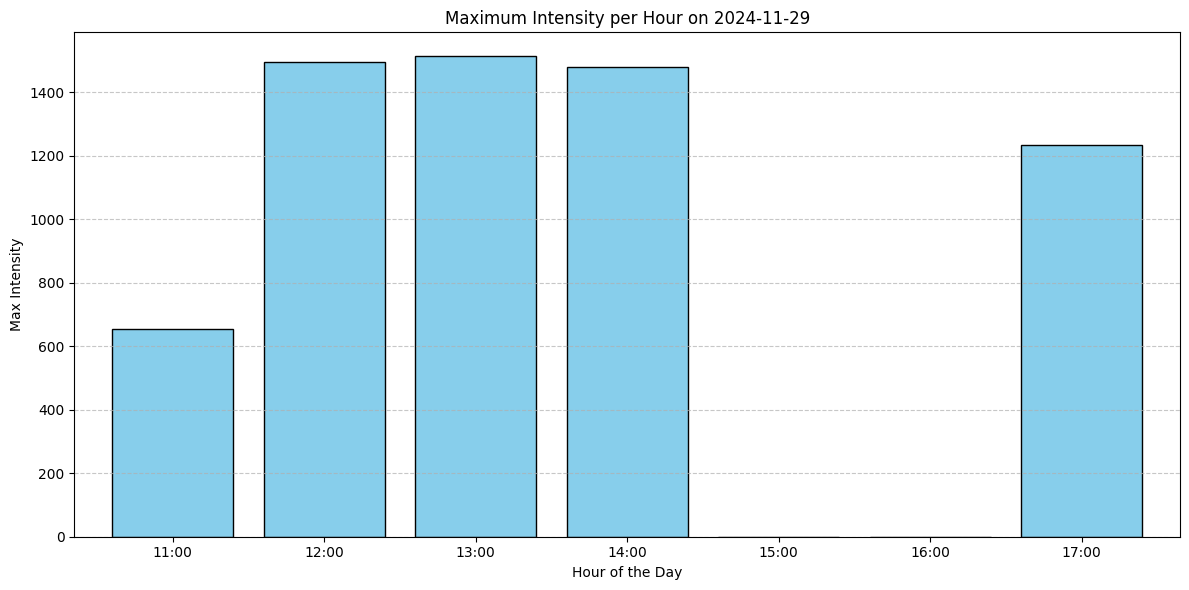

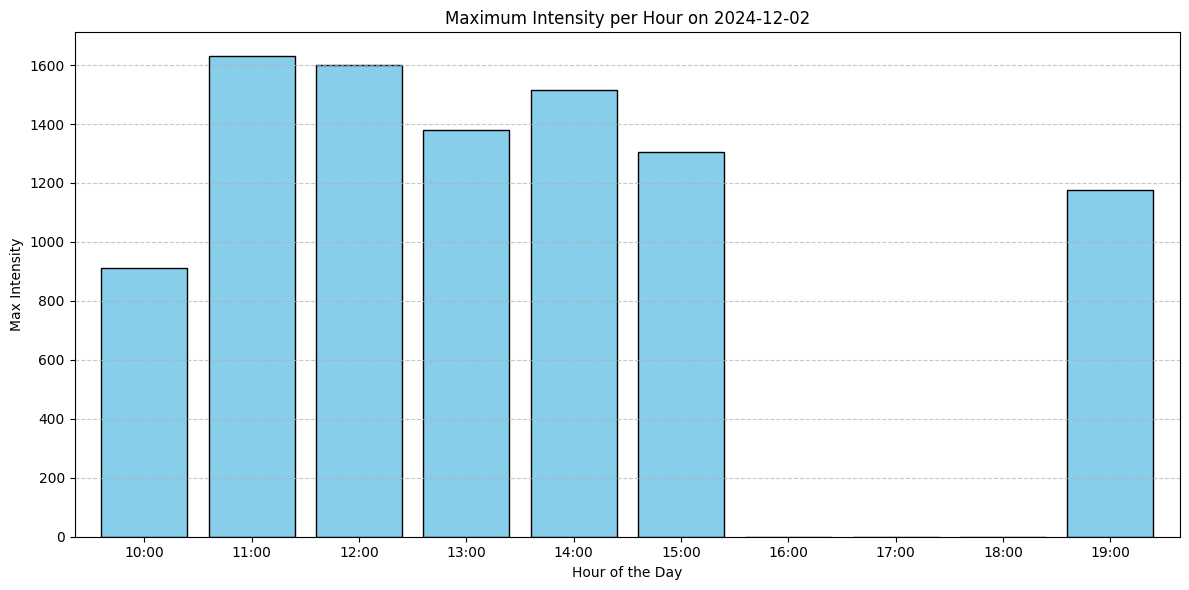

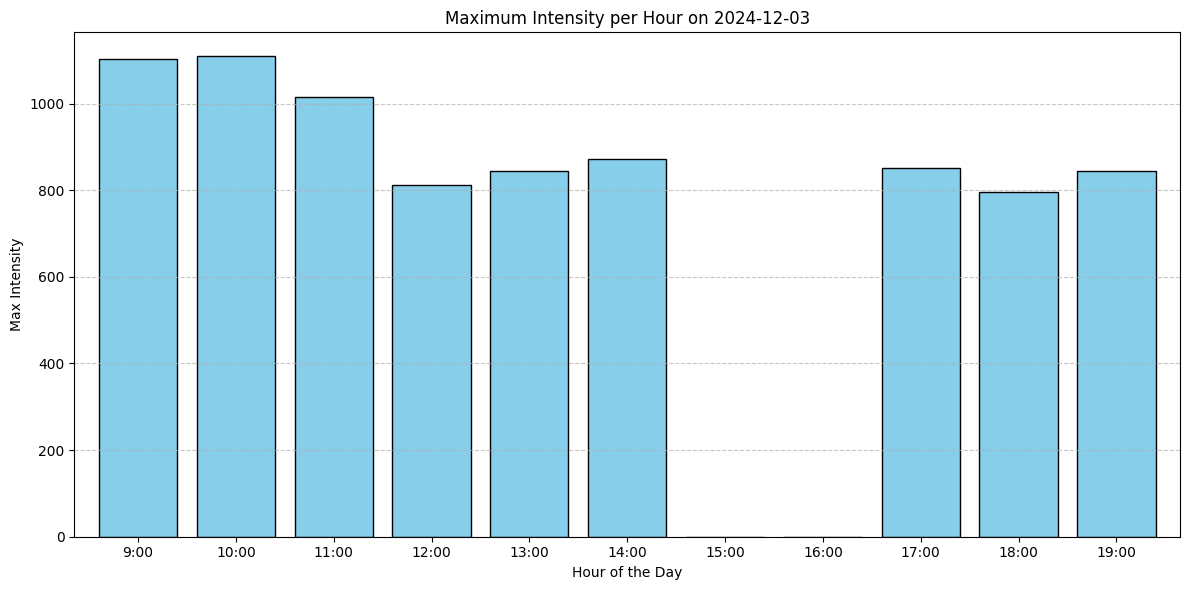

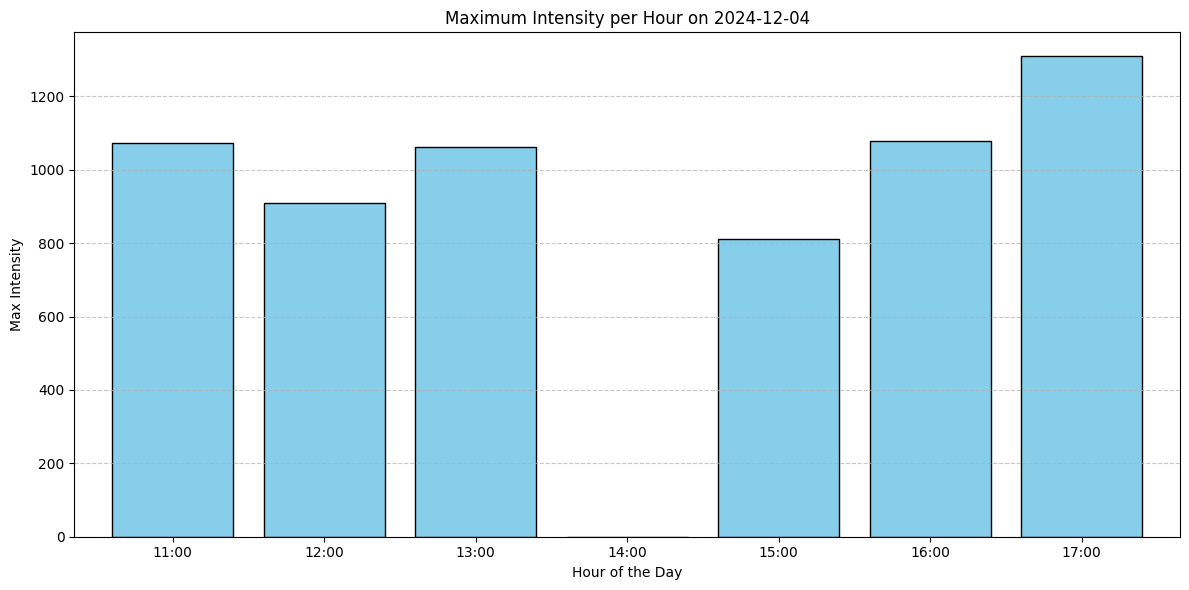

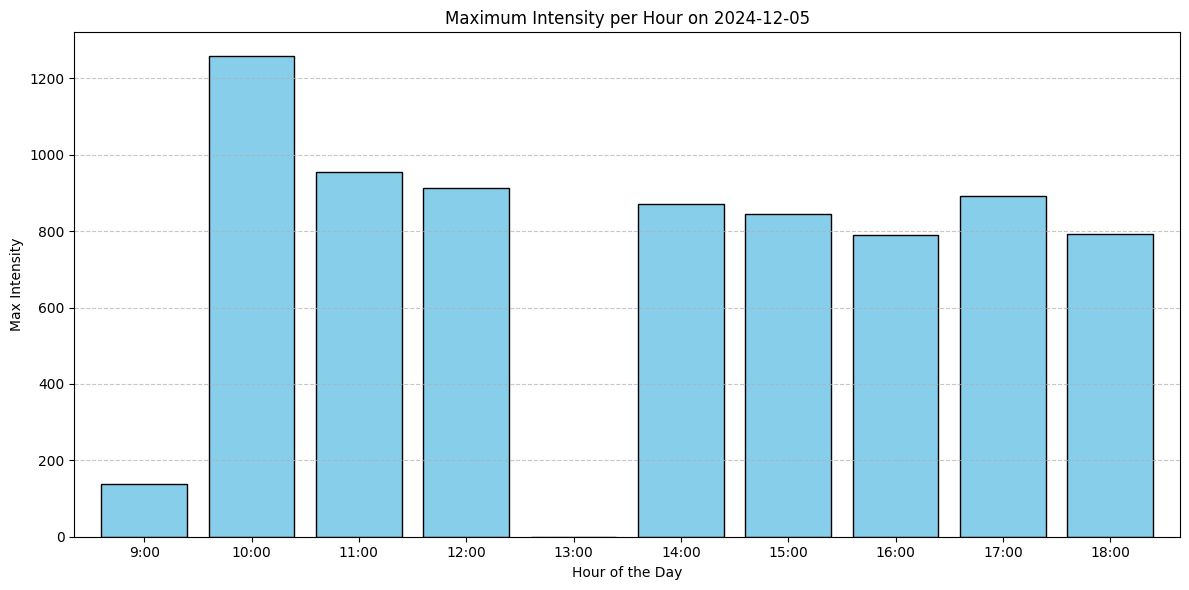

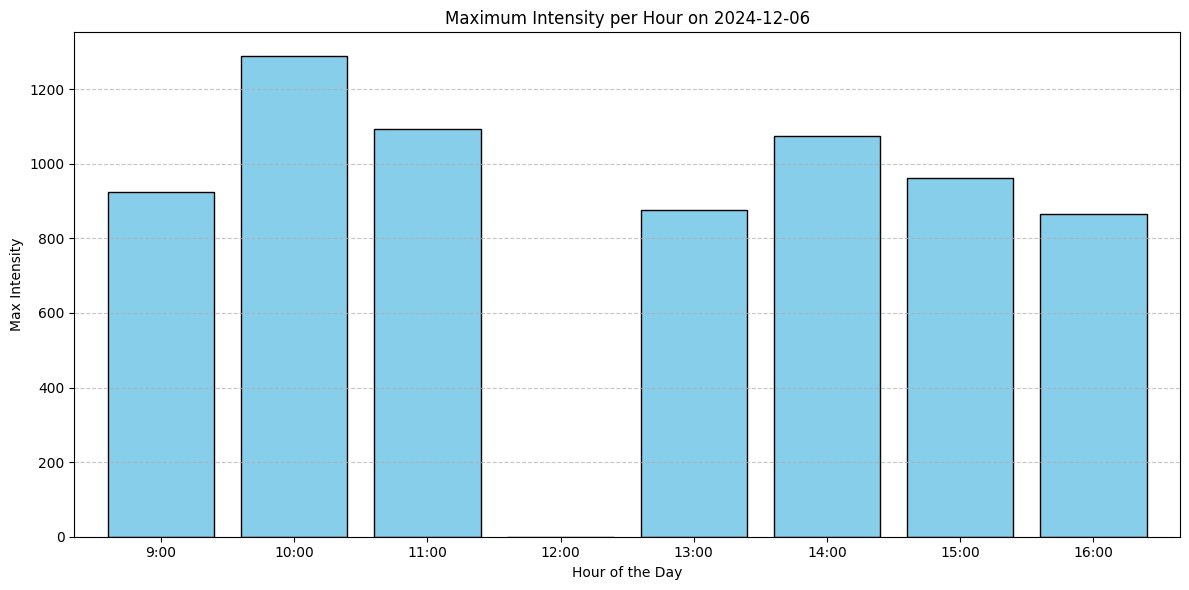

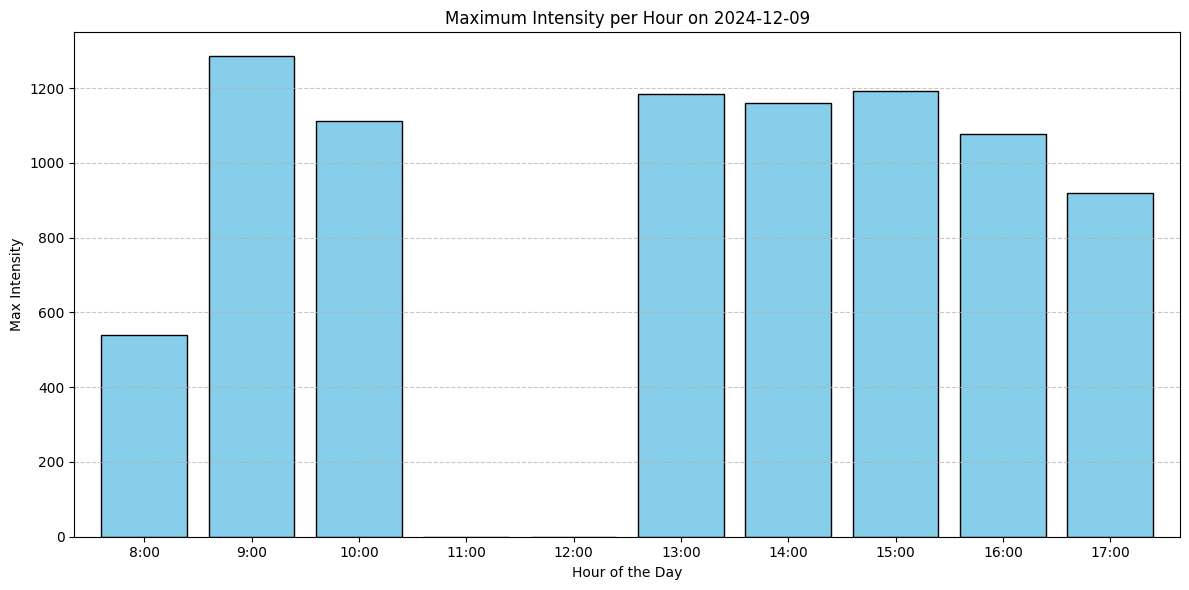

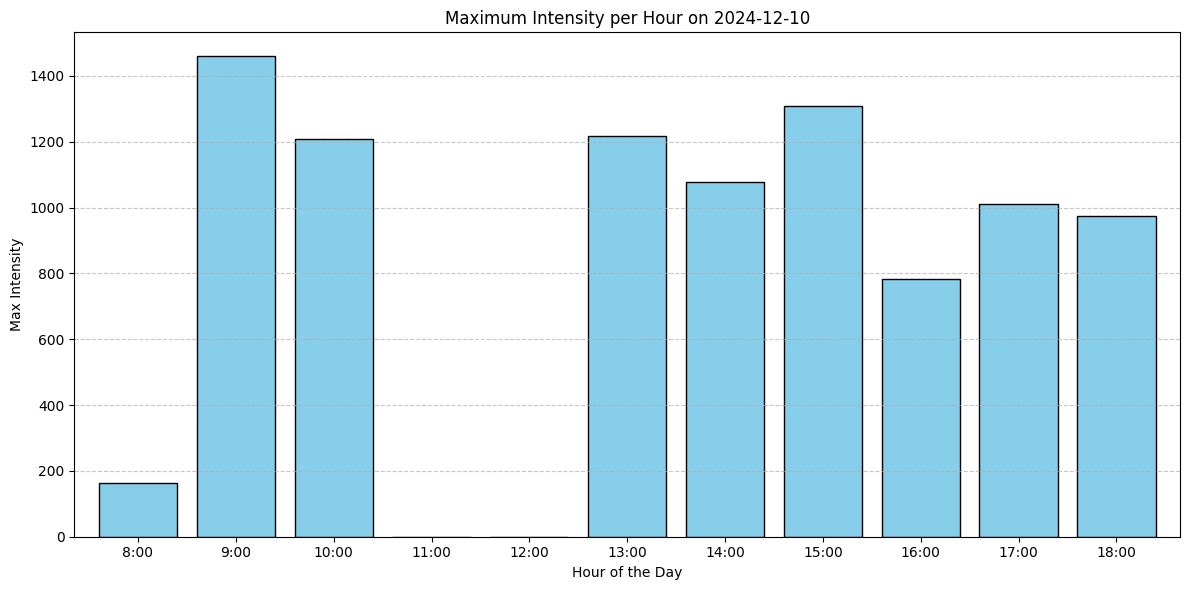

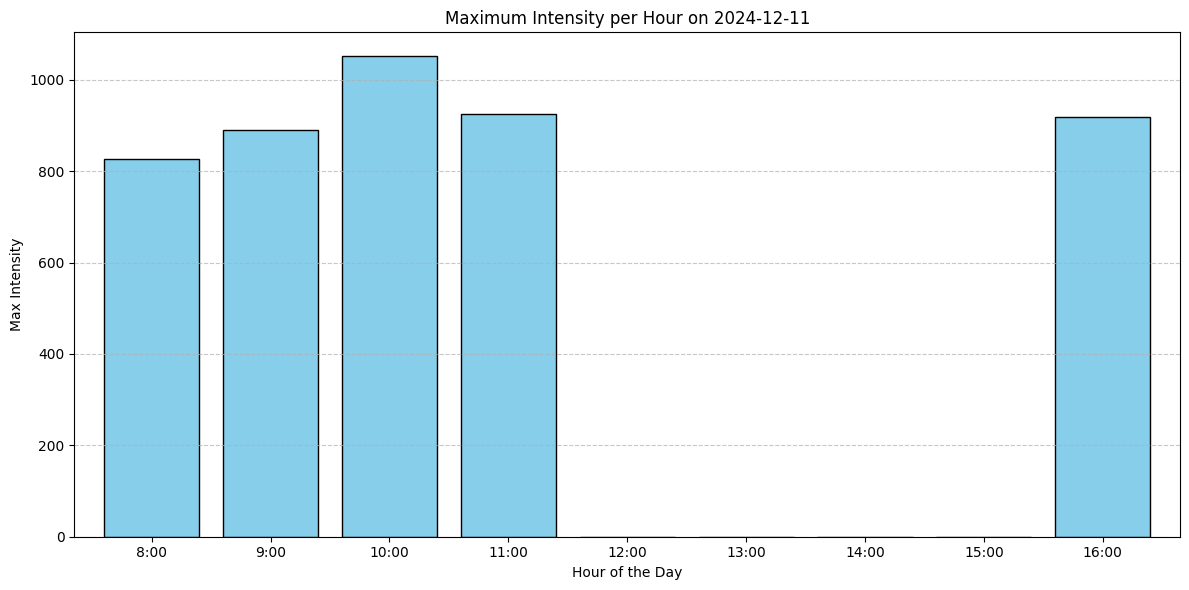

In [86]:
plot_daily_max_intensity(data_filtered)

/tmp/ipykernel_1982828/3555968008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = pd.to_datetime(df[time_column])
/tmp/ipykernel_1982828/3555968008.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df[time_column].dt.date
/tmp/ipykernel_1982828/3555968008.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

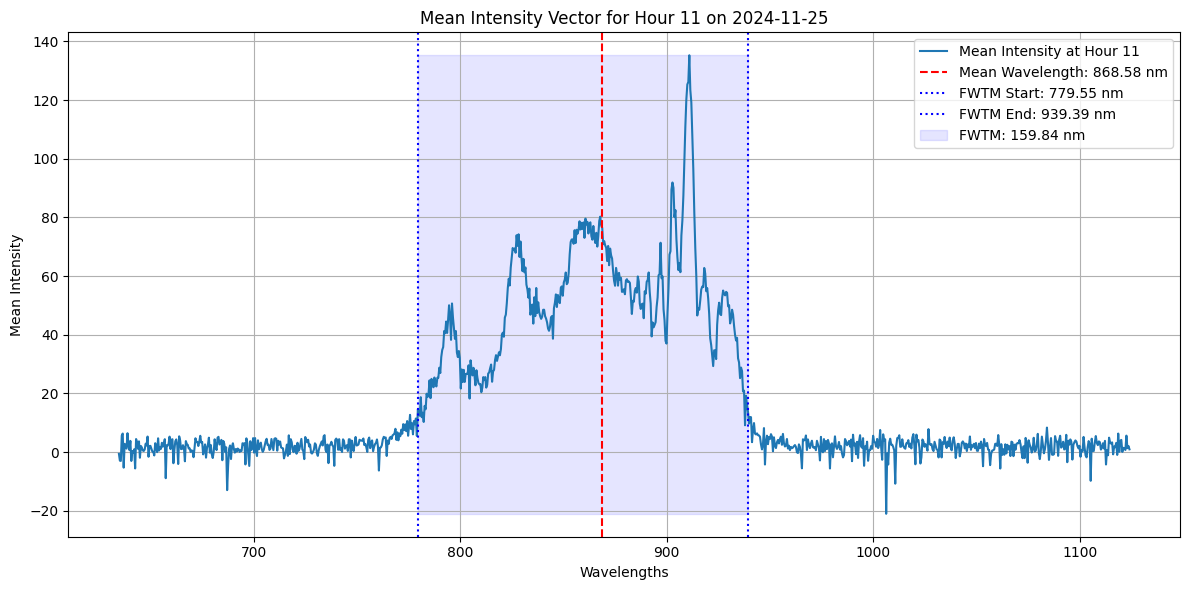

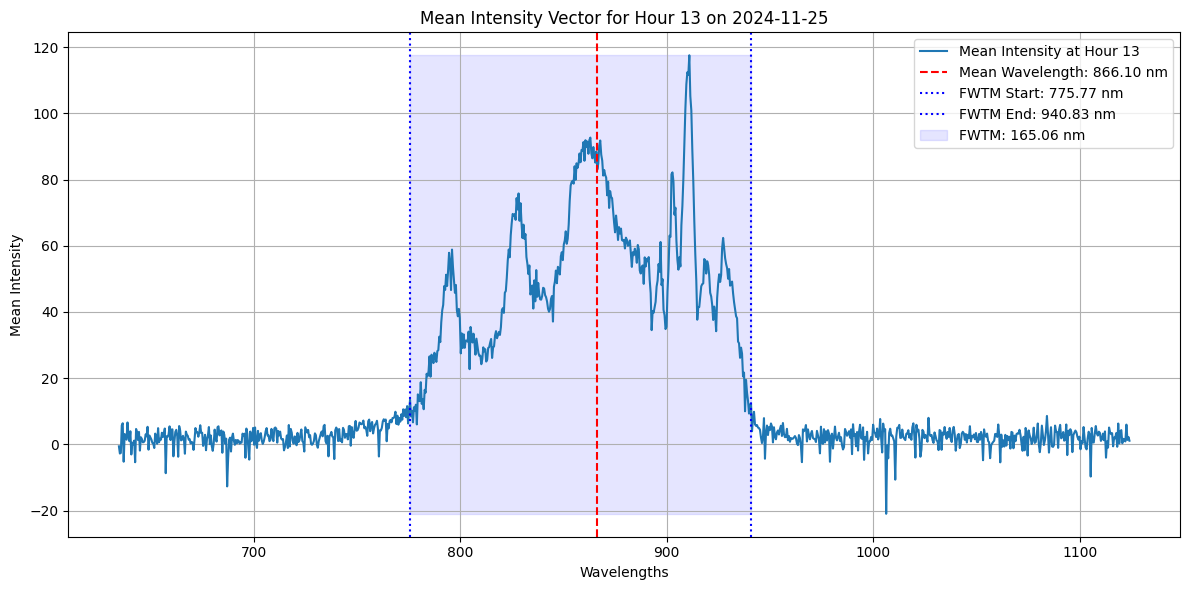

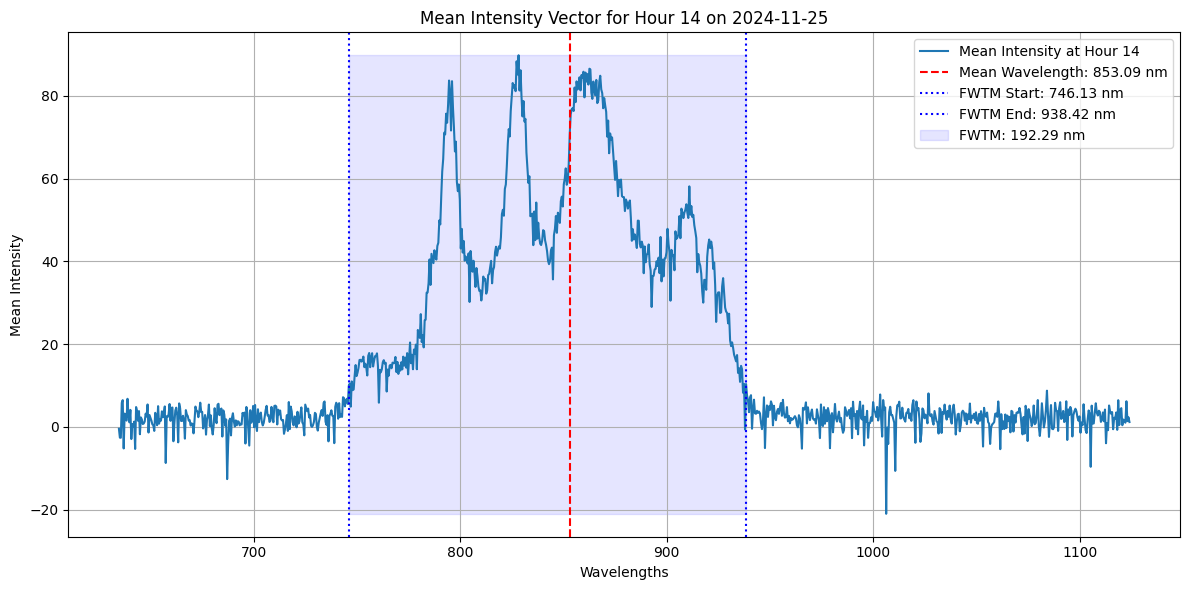

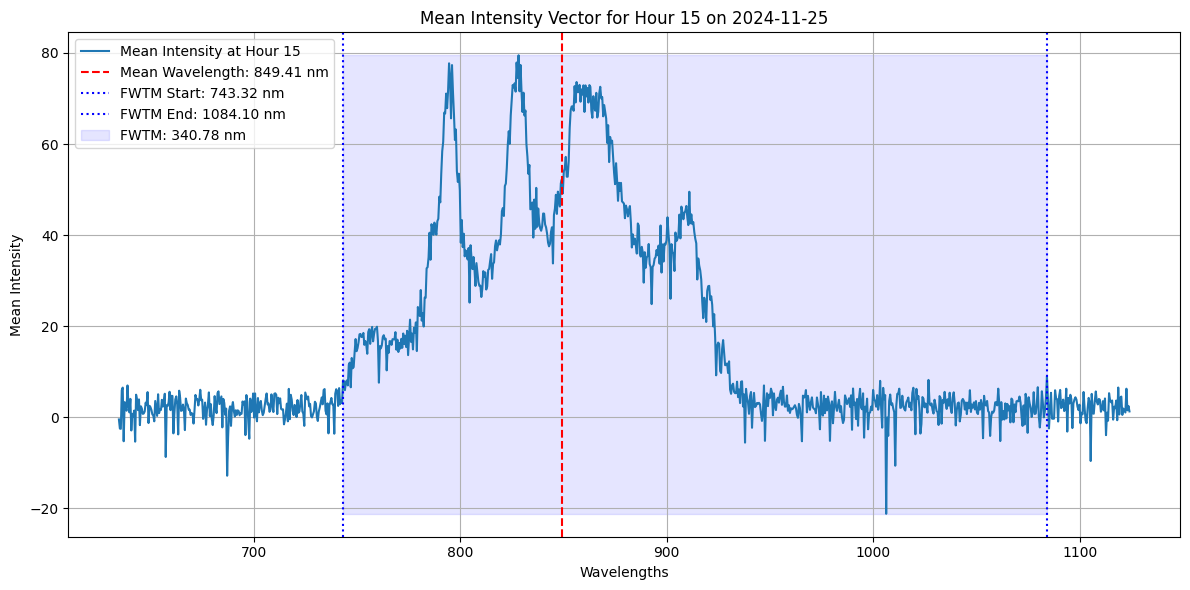

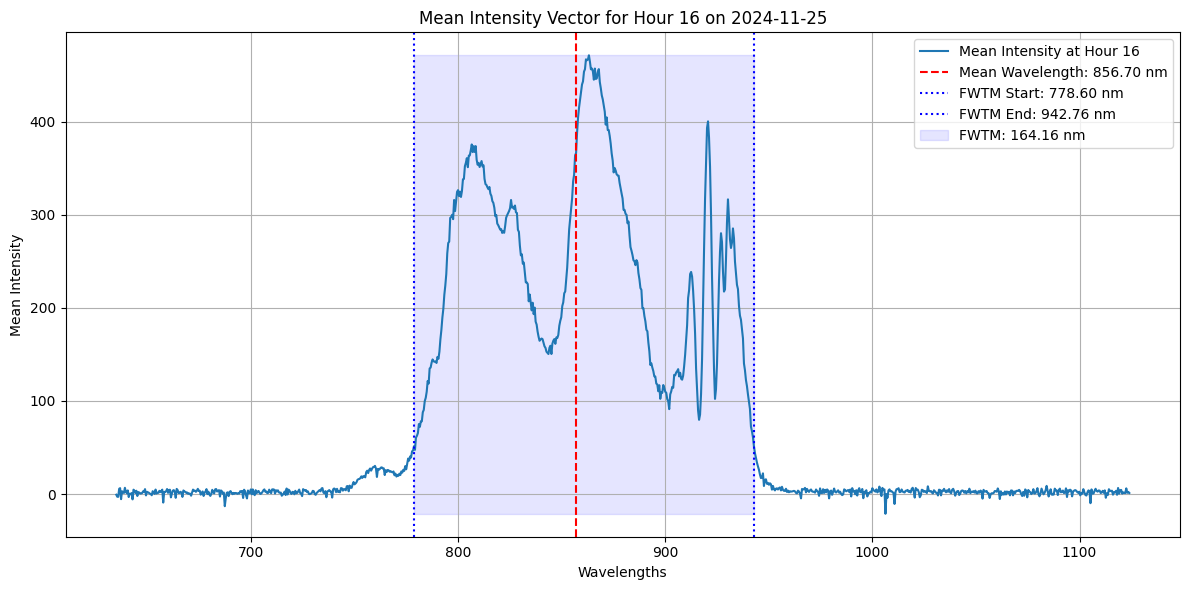

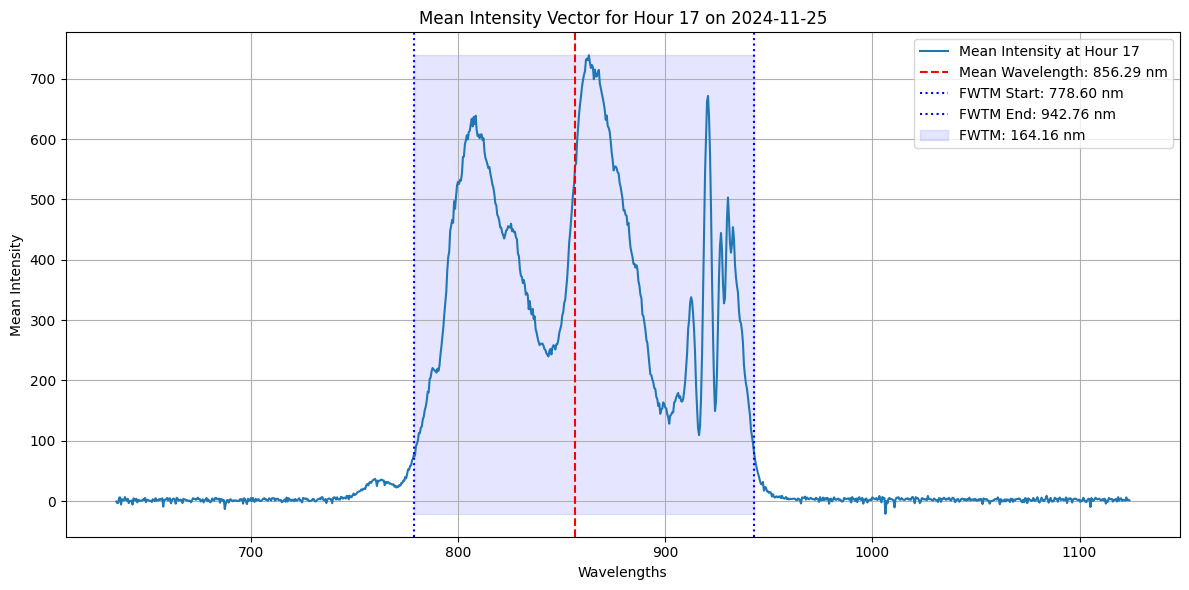

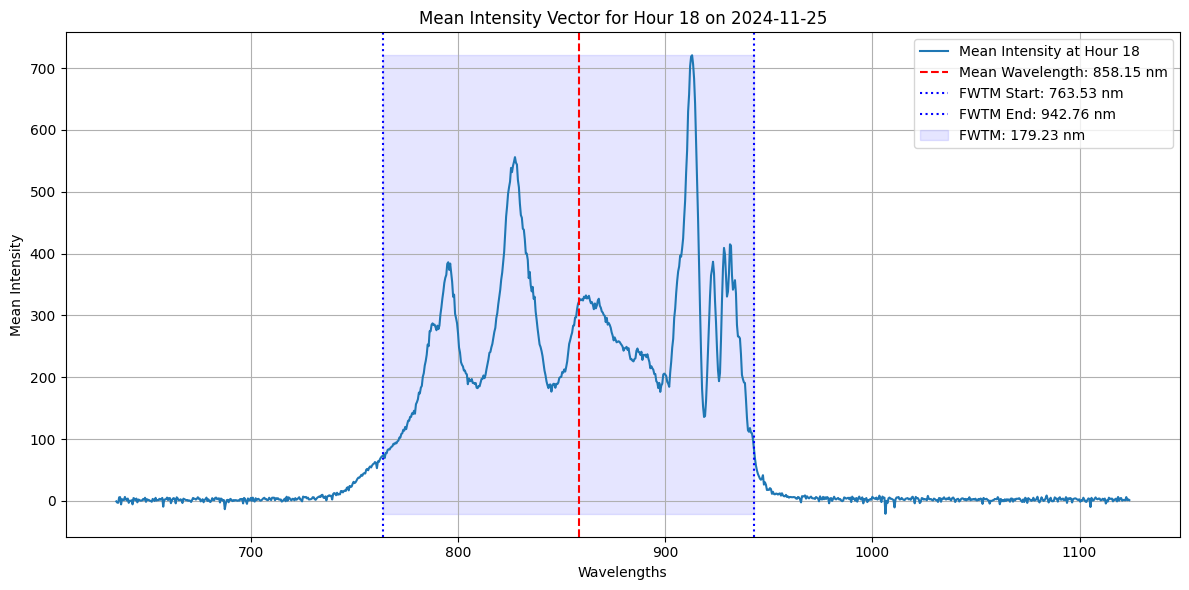

In [94]:
specific_date = pd.to_datetime('2024-11-25').date()
plot_mean_intensity_per_hour_for_day(data_filtered, specific_date, wavelengths=wavelengths_new)

/tmp/ipykernel_1982828/3555968008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = pd.to_datetime(df[time_column])
/tmp/ipykernel_1982828/3555968008.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df[time_column].dt.date
/tmp/ipykernel_1982828/3555968008.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

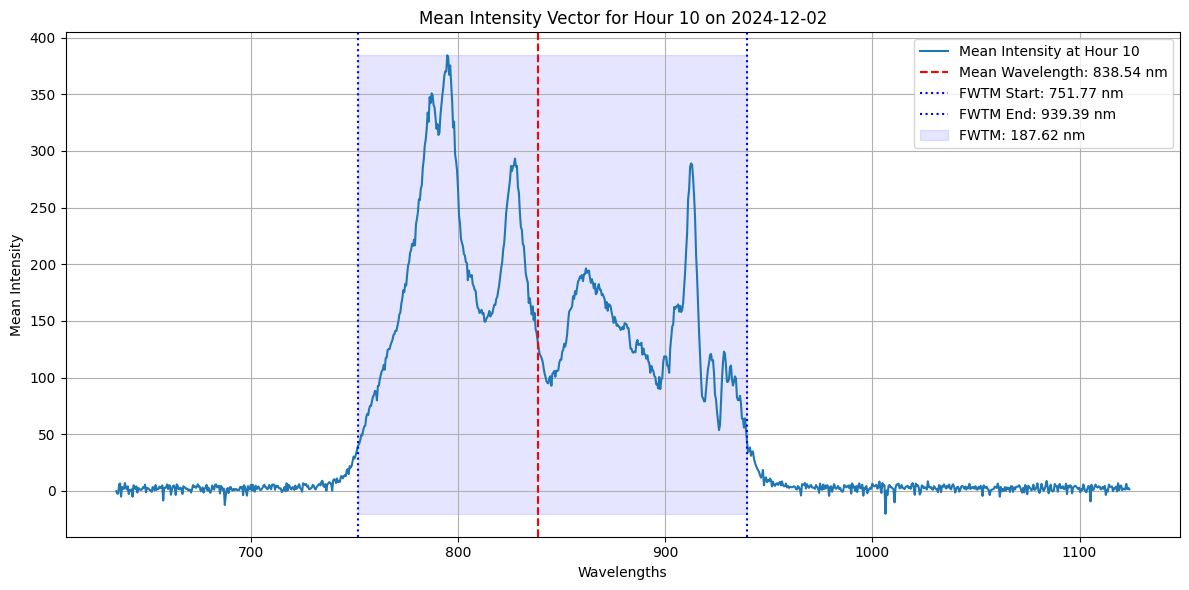

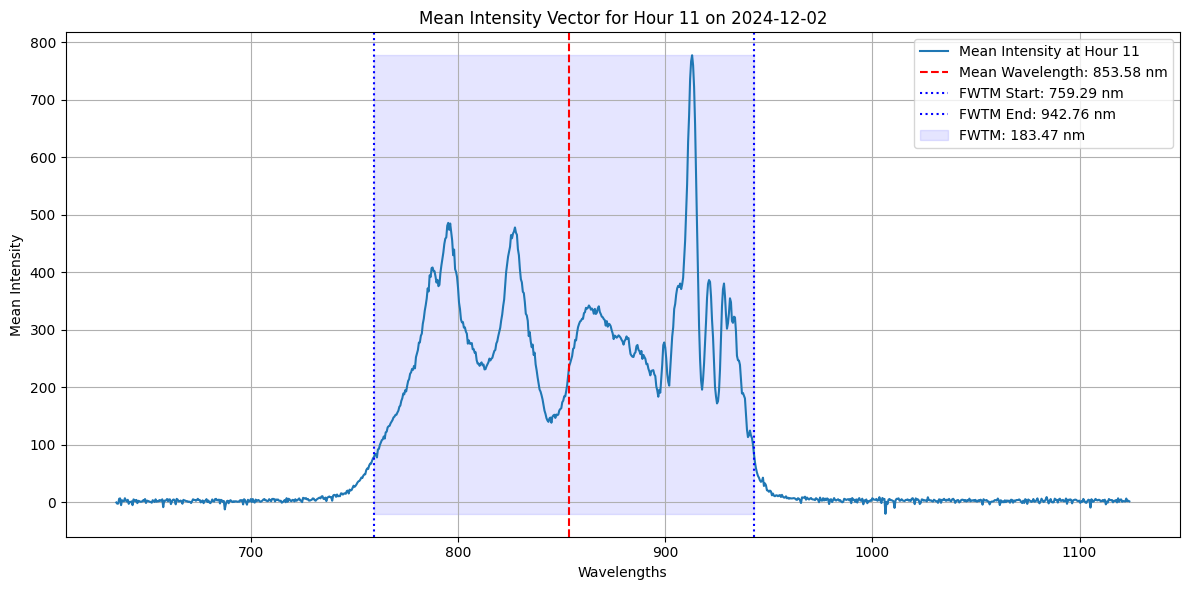

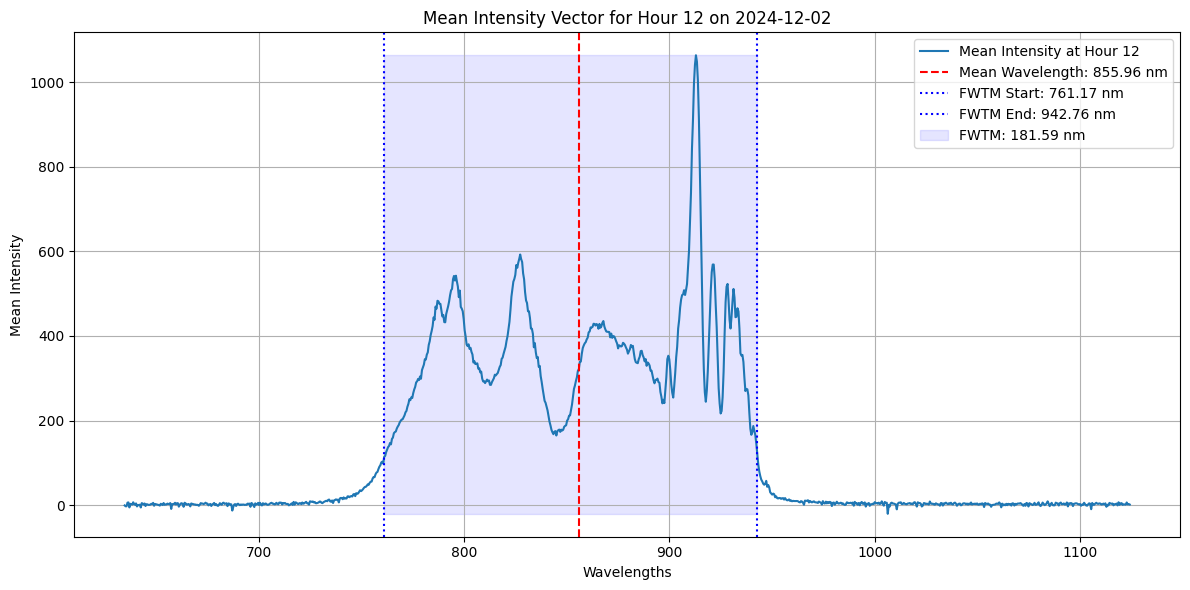

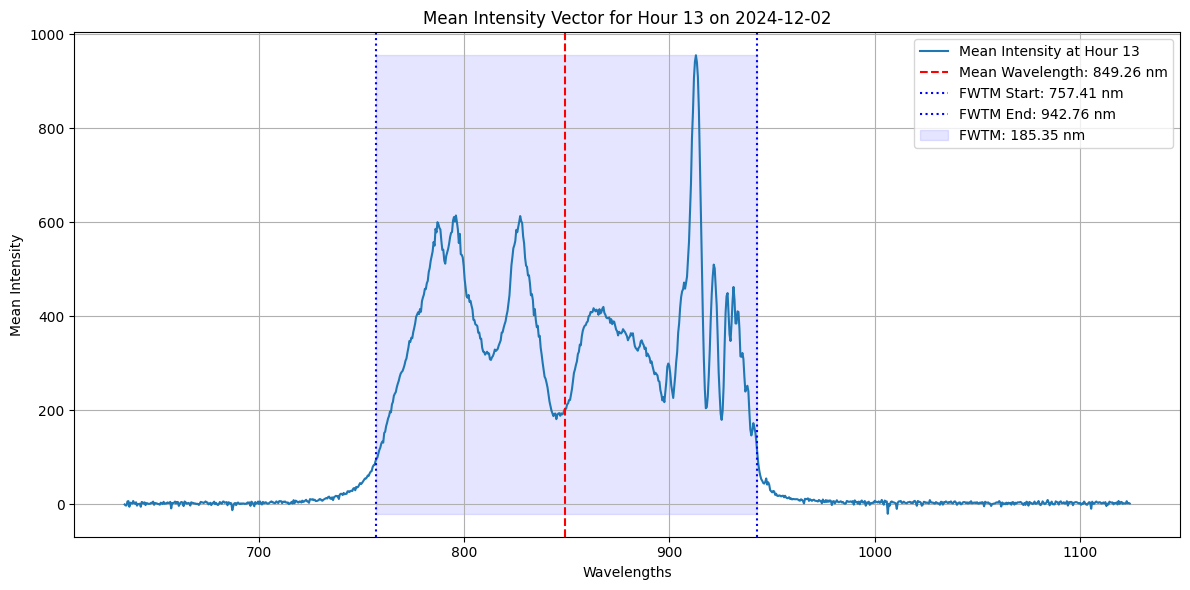

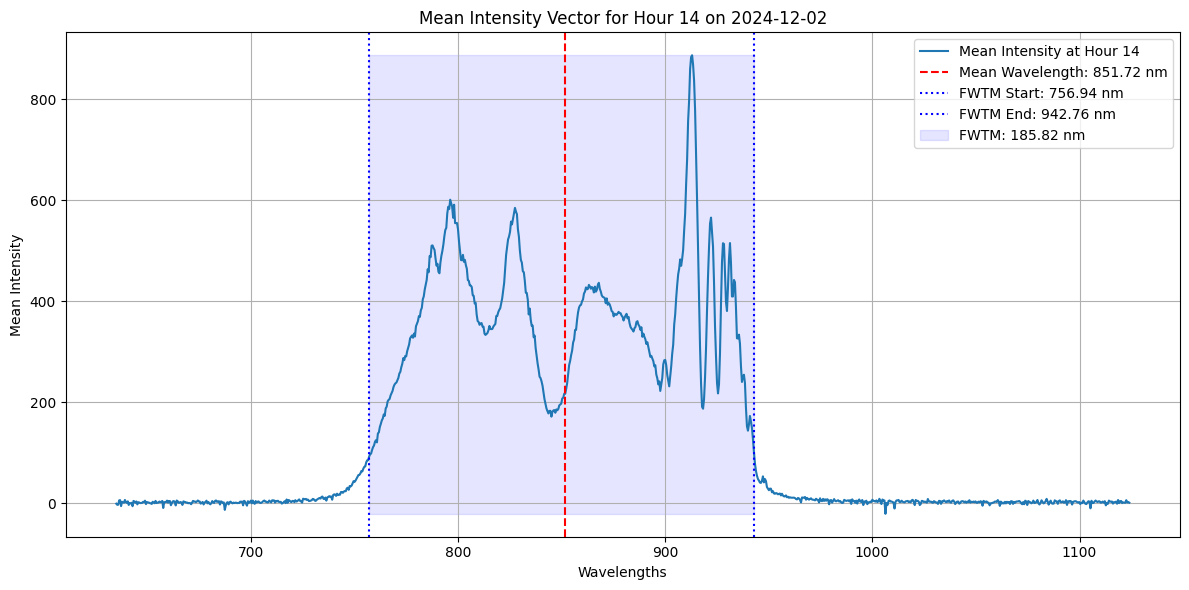

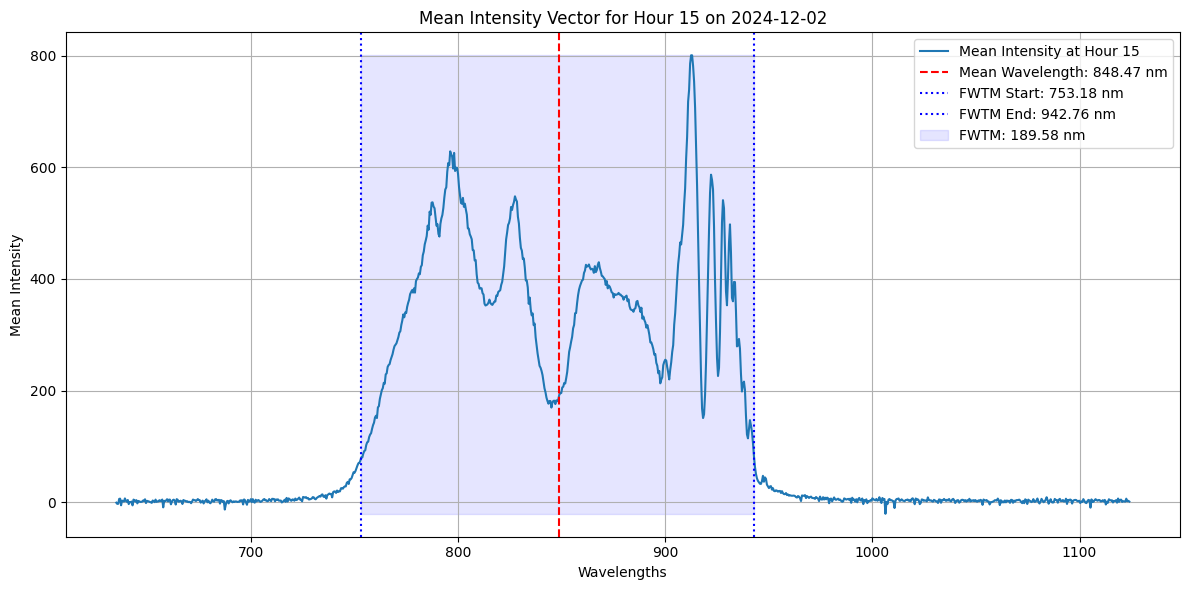

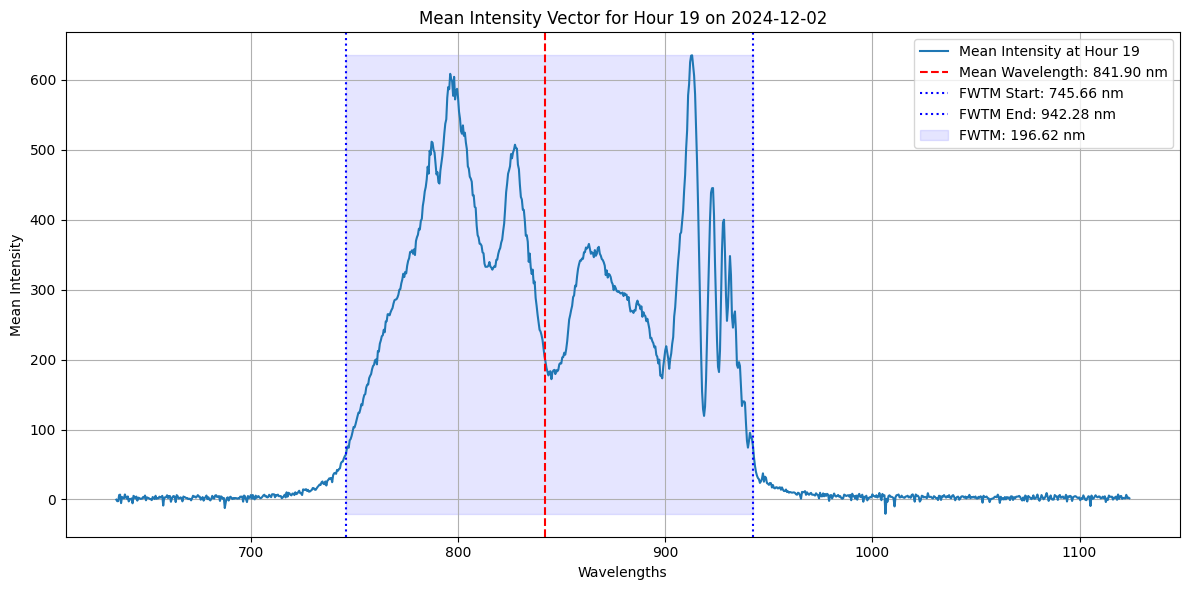

In [95]:
specific_date = pd.to_datetime('2024-12-02').date()
plot_mean_intensity_per_hour_for_day(data_filtered, specific_date, wavelengths=wavelengths_new)

## Save file

In [81]:
data_filtered_modified = data_filtered.copy()
data_filtered_modified['Intensities'] = data_filtered_modified['Intensities'].apply(lambda x: ','.join(map(str, x)))

data_filtered_modified.to_csv('../data/intensities_filtered_stg7.csv', index=False)